
### About Dataset

Dataset contains information about flight booking options from the website Easemytrip for flight travel between India's top 6 metro cities. There are 300261 datapoints and 11 features in the cleaned dataset. Data was collected for 50 days, from February 11th to March 31st, 2022. Data source was secondary data and was collected from Ease my trip website.


### Features

The various features of the cleaned dataset are explained below:
1. *Airline*: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
2. *Flight*: Flight stores information regarding the plane's flight code. It is a categorical feature.
3. *Source City*: City from which the flight takes off. It is a categorical feature having 6 unique cities.
4. *Departure Time*: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
5. *Stops*: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
6. *Arrival Time*: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
7. *Destination City*: City where the flight will land. It is a categorical feature having 6 unique cities.
8. *Class*: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.
9. *Duration*: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.
10. *Days Left*: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.
11. *Price*: Target variable stores information of the ticket price.

### import libaries

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('whitegrid')

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 


### import dataset

In [4]:
df = pd.read_csv('../data/raw_data/Clean_Dataset.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.75,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [5]:
# check missing value
df.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB



<p> </b>note: There is no missing value </b </p>

In [5]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,300153.0,150076.000000,86646.852011,0.00,75038.00,150076.00,225114.00,300152.00
duration,300153.0,12.221021,7.191997,0.83,6.83,11.25,16.17,49.83
days_left,300153.0,26.004751,13.561004,1.00,15.00,26.00,38.00,49.00
price,300153.0,20889.660523,22697.767366,1105.00,4783.00,7425.00,42521.00,123071.00


### Data Frequency

1. related top frequency of each column catergory variable
2. for contineous variable, we can see mean, std, Quantile (Q1, Q2, Q3), max, outlier

In [6]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,300153.0,NaN,NaN,NaN,150076.0,86646.852011,0.0,75038.0,150076.0,225114.0,300152.0
airline,300153,6,Vistara,127859,NaN,NaN,NaN,NaN,NaN,NaN,NaN
flight,300153,1561,UK-706,3235,NaN,NaN,NaN,NaN,NaN,NaN,NaN
source_city,300153,6,Delhi,61343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
departure_time,300153,6,Morning,71146,NaN,NaN,NaN,NaN,NaN,NaN,NaN
stops,300153,3,one,250863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arrival_time,300153,6,Night,91538,NaN,NaN,NaN,NaN,NaN,NaN,NaN
destination_city,300153,6,Mumbai,59097,NaN,NaN,NaN,NaN,NaN,NaN,NaN
class,300153,2,Economy,206666,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,300153.0,NaN,NaN,NaN,12.221021,7.191997,0.83,6.83,11.25,16.17,49.83


In [7]:
df.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

### Checking Distribution based on ticket price 

### hisplot plot

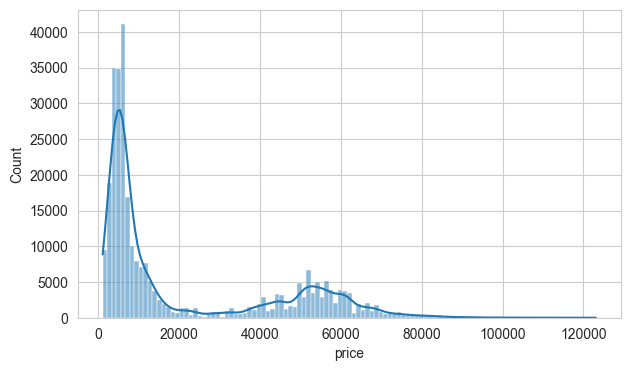

In [8]:
plt.figure(figsize = (7,4))
sns.histplot( x = 'price', data = df, kde = True)
plt.show()

#### Economy class distribution


In [9]:
df['class'].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

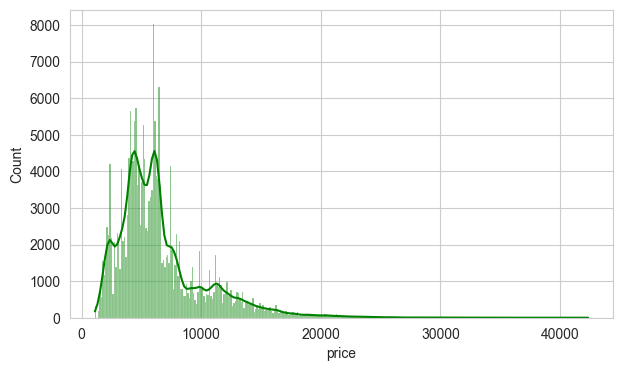

In [10]:
plt.figure(figsize=(7,4))
sns.histplot( x = 'price', data = df[df['class']=='Economy'], kde = True, color='green')
plt.show()

#### Business Class Distribution

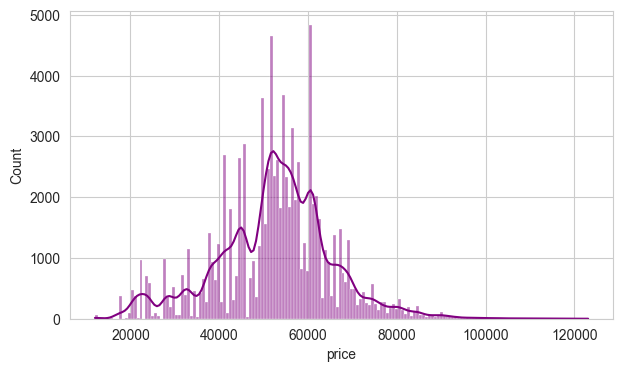

In [11]:
plt.figure(figsize=(7,4))
sns.histplot(x="price", data = df[df['class'] != "Economy"], kde = True, color='purple')
plt.show()

In [12]:
print('average price of all class: {}'.format(df.price.mean()))
print('average price of economy class class: {}'.format(df[df['class'] == 'Economy'].price.mean()))
print('average price of business class class: {}'.format(df[df['class'] != 'Economy'].price.mean()))
print('= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = ')
print('median price of all class: {}'.format(df.price.median()))
print('median price of economy class class: {}'.format(df[df['class'] == 'Economy'].price.median()))
print('median price of business class class: {}'.format(df[df['class'] != 'Economy'].price.median()))

average price of all class: 20889.660523133203
average price of economy class class: 6572.342383362527
average price of business class class: 52540.08112357868
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
median price of all class: 7425.0
median price of economy class class: 5772.0
median price of business class class: 53164.0


<p> <b> Here mean value of the price is 20889.66 and median is 7425 </b> <p>

### Countplot over Categorical Value

In [13]:
df.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

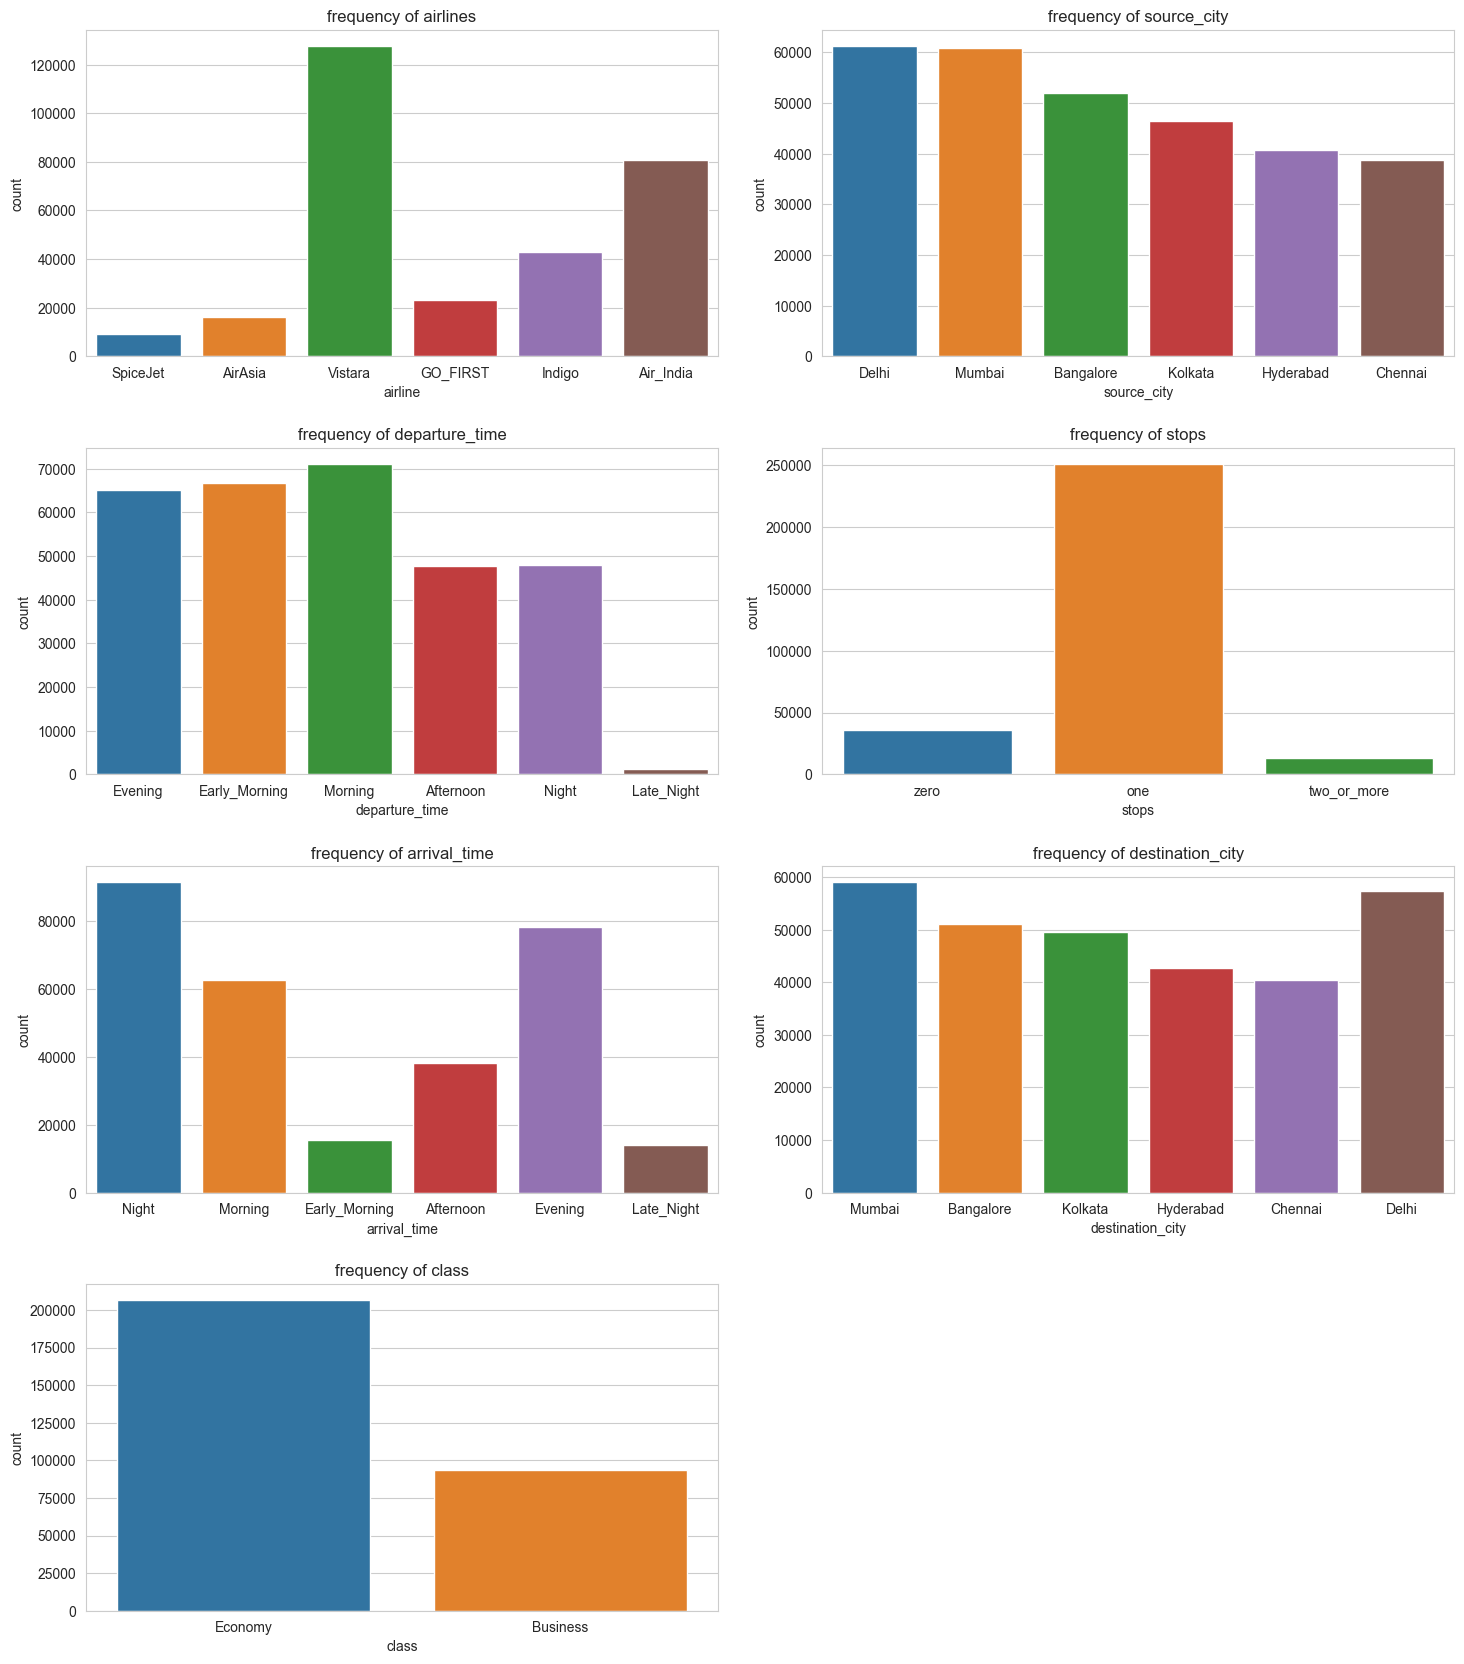

In [15]:

plt.figure(figsize =(15,17))


#for airline
plt.subplot(4,2,1) #row-4, col - 2, plot-1
sns.countplot( x = df['airline'], data = df)
plt.title("frequency of airlines")

#for source_city
plt.subplot(4,2,2) #row-4, col - 2, plot-2
sns.countplot( x = df['source_city'], data = df)
plt.title("frequency of source_city")

#for departure_time
plt.subplot(4,2,3) #row-4, col - 2, plot-3
sns.countplot( x = df['departure_time'], data = df)
plt.title("frequency of departure_time")

#for stops
plt.subplot(4,2,4) #row-4, col - 2, plot-4
sns.countplot( x = df['stops'], data = df)
plt.title("frequency of stops")

#for arrival_time
plt.subplot(4,2,5) #row-4, col - 2, plot-5
sns.countplot( x = df['arrival_time'], data = df)
plt.title("frequency of arrival_time")


#for destination_city
plt.subplot(4,2,6) #row-4, col - 2, plot-5
sns.countplot( x = df['destination_city'], data = df)
plt.title("frequency of destination_city")

#for class
plt.subplot(4,2,7) #row-4, col - 2, plot-5
sns.countplot( x = df['class'], data = df)
plt.title("frequency of class")

plt.tight_layout(pad= 2.0)
plt.show()

### How ticket price varies for different Airline Companies with respect to Economy and Business Class

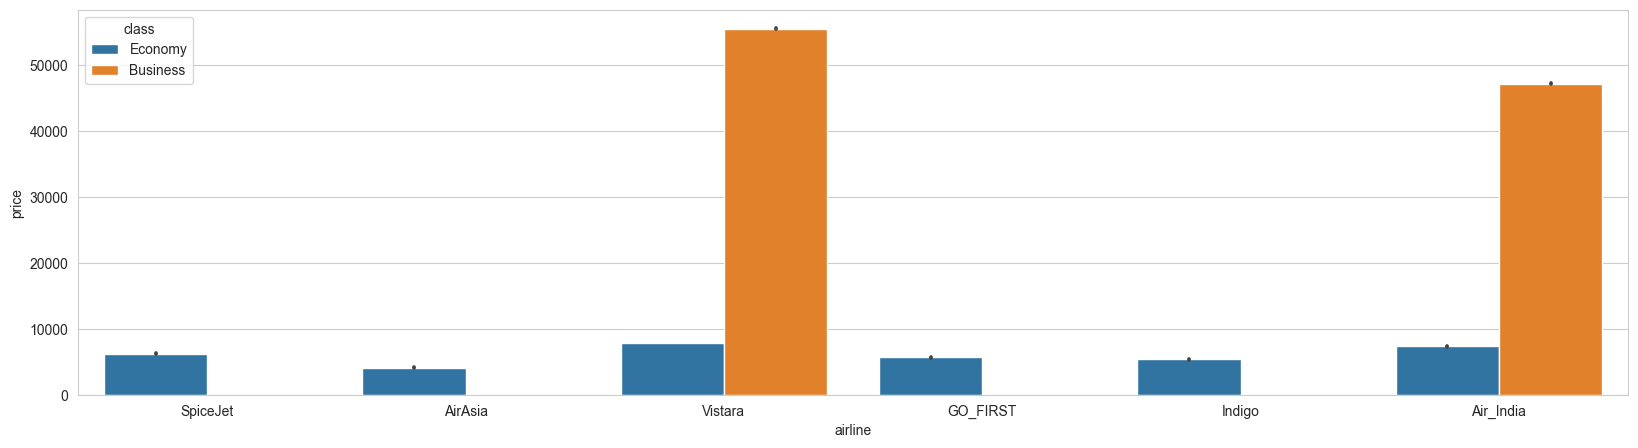

In [16]:
plt.figure(figsize=(20,5))
sns.barplot(x ='airline', y = 'price', data = df, hue = 'class')
plt.show()


<p>📌<b> only Vistara and Air_India have Business Class. Air_India Business class ticket price is lower than Vistara. </b> </p>

### Does Price Varies with Airlines?

compare price for different class individually as price has a great impact as per class

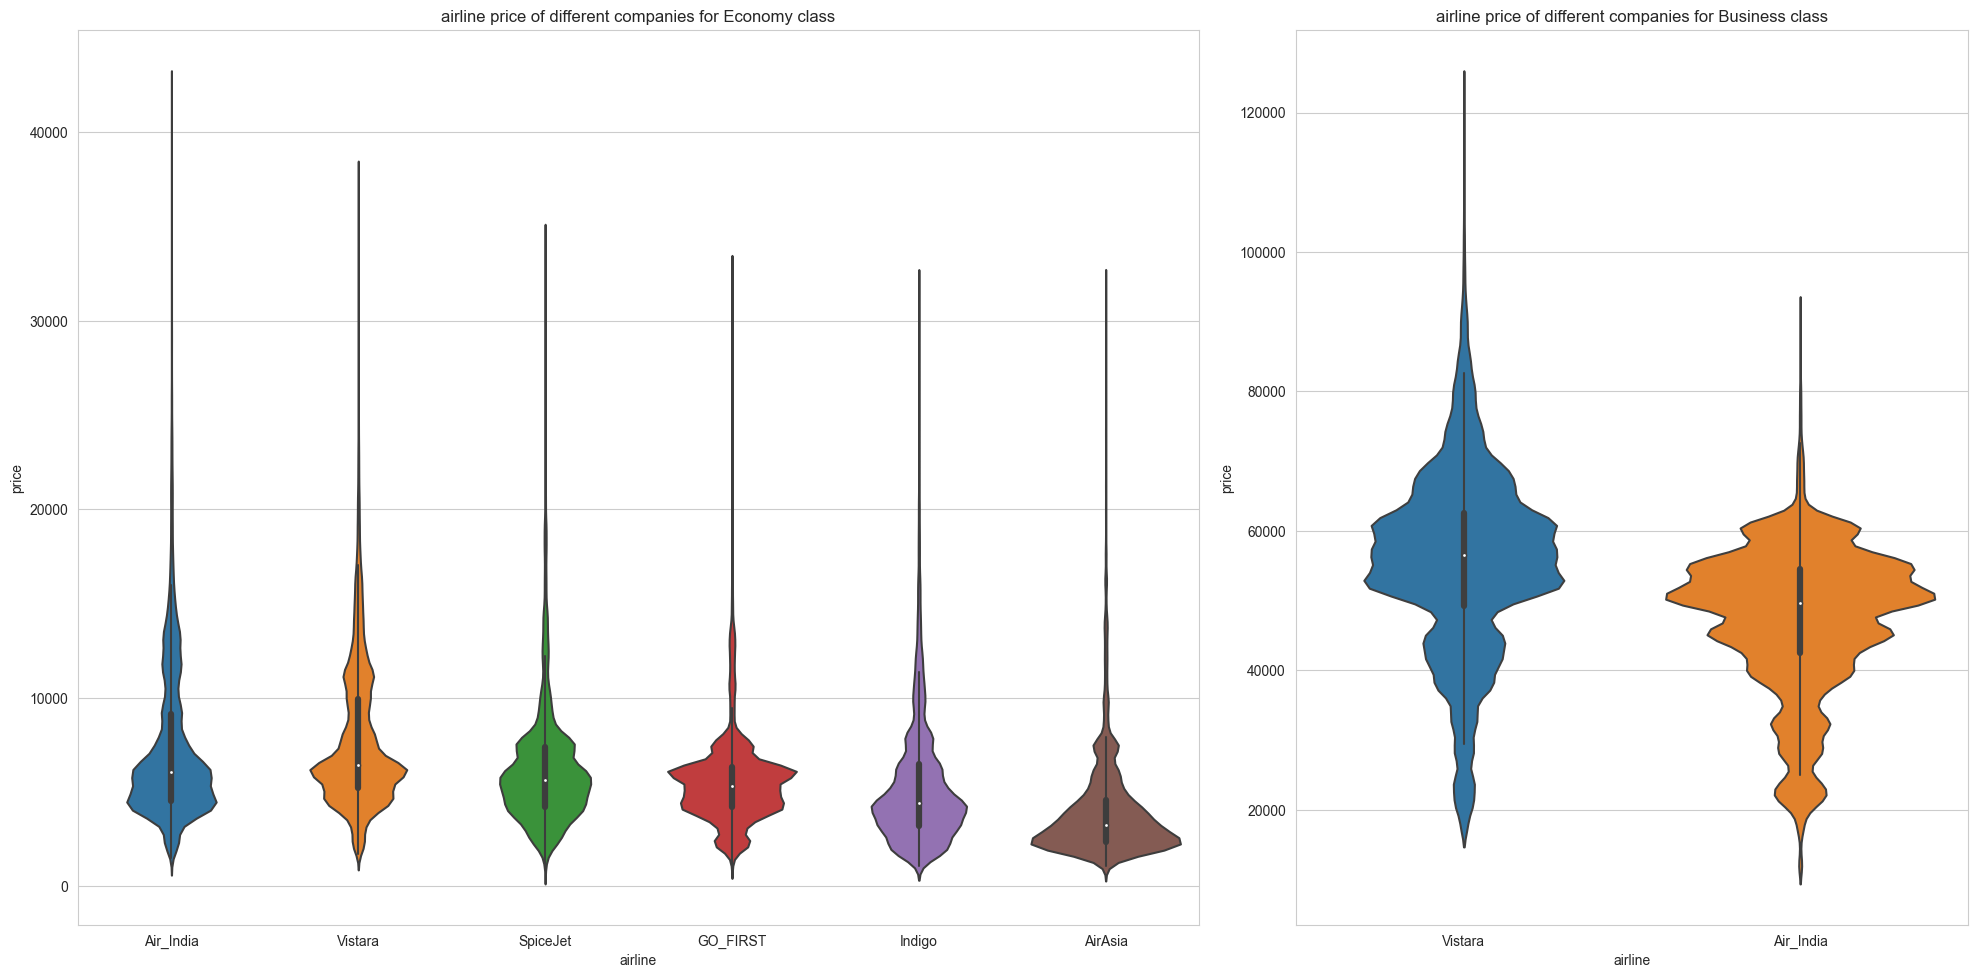

In [17]:
fig, axs = plt.subplots(1, 2, gridspec_kw={'width_ratios': [5, 3]}, figsize = (20,10)) #graph ratio: first graph will take space 5 and other 3

sns.violinplot( y ='price', x = 'airline', 
               data = df.loc[df['class']=='Economy'].sort_values('price', ascending = False),
               kind = 'boxen', ax = axs[0])
axs[0].set_title("airline price of different companies for Economy class")


sns.violinplot( y ='price', x = 'airline', 
               data = df.loc[df['class']=='Business'].sort_values('price', ascending = False),
               kind = 'boxen', ax = axs[1])
axs[1].set_title("airline price of different companies for Business class")

plt.tight_layout(pad = 1.5)
plt.show()

 <p> 📌<b>There are slight differences between each companies on this graph, AirAia serves the cheapest airfare comparing to other compines for economy class. Vistara is more expensive than the Air_india for Business Class </b> </p>.

### How the price affected when the ticket had purchased 1 t0 2 days earlier

In [18]:
df.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

In [19]:
#perform aggregation

df_temp = df.groupby(['days_left'])['price'].mean().reset_index()
df_temp[0:5]

,days_left,price
0,1,21591.867151
1,2,30211.299801
2,3,28976.083569
3,4,25730.905653
4,5,26679.773368


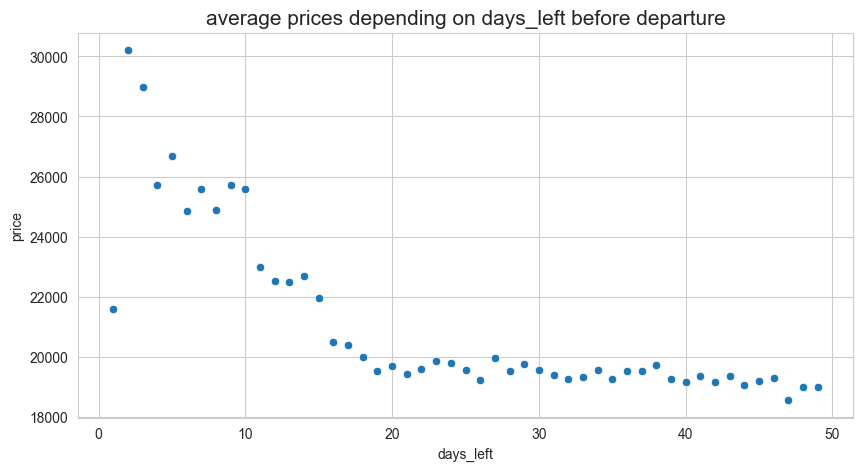

In [20]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = 'days_left', y = 'price', data = df_temp)
plt.title("average prices depending on days_left before departure", fontsize = 15)
plt.show()

 <p> 📌<b>Most of the cases, we can't find ticket before 1 day earlier. Price is higher if 2 days left compare to 1 days. Reason might be selling the unsold tickets. Price is low and constant in between 20 to 50 days </b> </p>.
 

we have segmented the scatter plots into 3. Where days_left(1), days_left(2 to 20) and days_left(20 to 50) to draw regression lines.
Here, we filter it out for days_left(1)

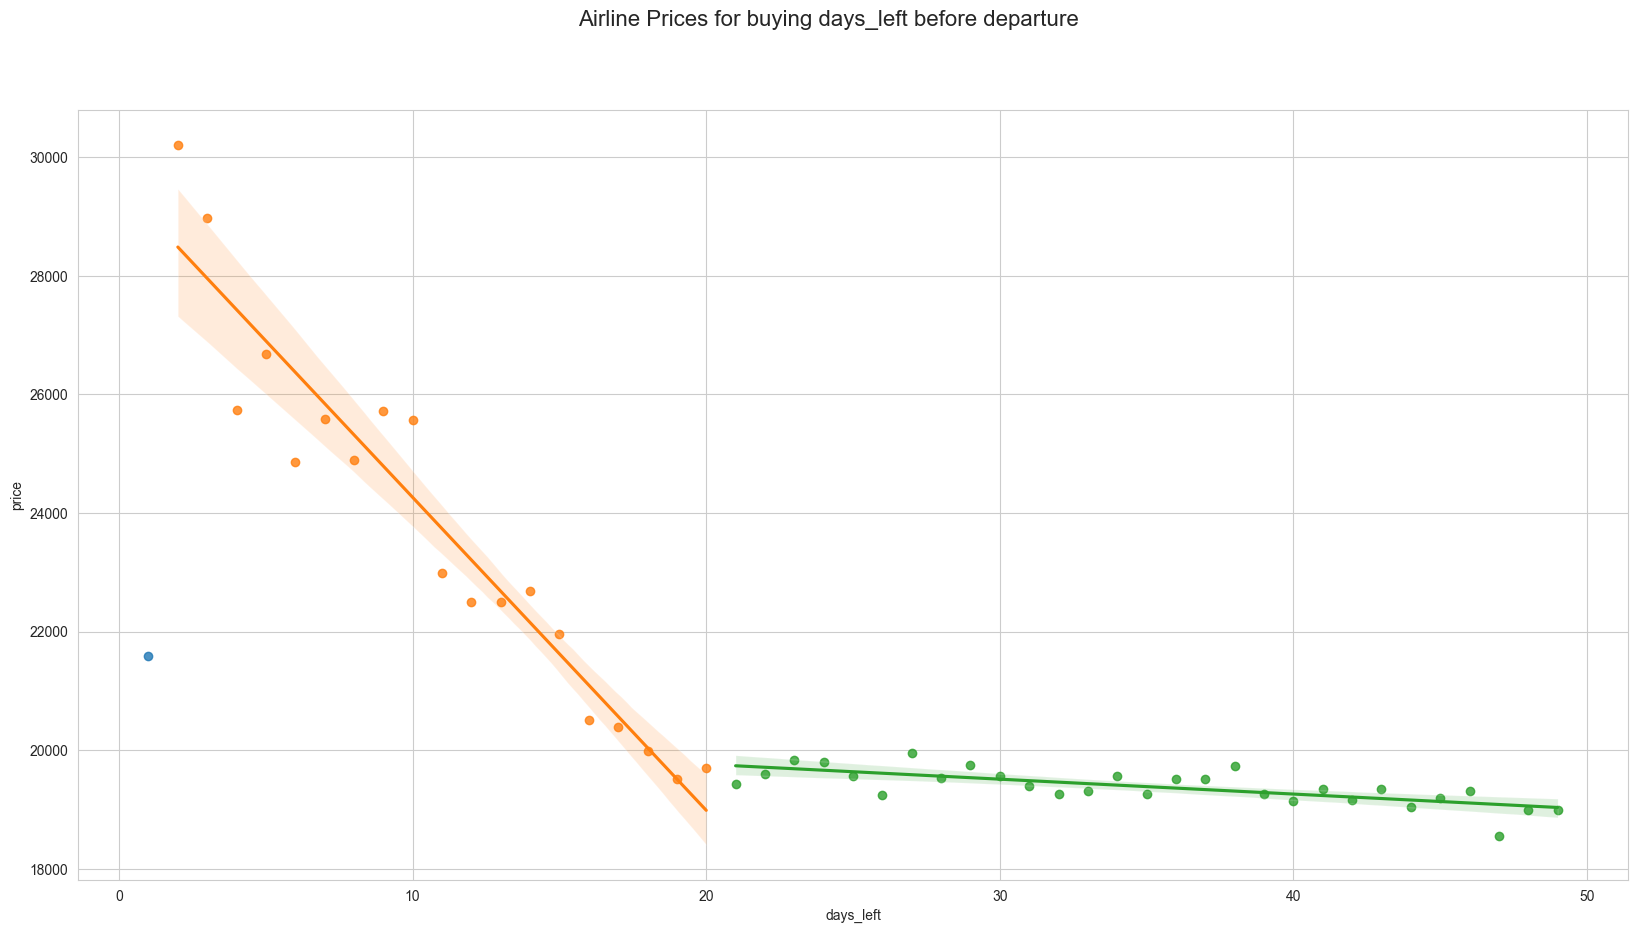

In [21]:
plt.figure(figsize = (20,10)).suptitle("Airline Prices for buying days_left before departure", fontsize = 16)

ax = plt.axes()

sns.regplot( x = df_temp.loc[df_temp['days_left']==1].days_left,
            y = df_temp.loc[df_temp['days_left']==1].price, fit_reg = False, ax =ax)

sns.regplot( x = df_temp.loc[(df_temp['days_left']>1) & (df_temp['days_left']<=20)].days_left,
            y = df_temp.loc[(df_temp['days_left']>1) & (df_temp['days_left']<=20)].price, fit_reg = True, ax =ax)

sns.regplot( x = df_temp.loc[df_temp['days_left']>20].days_left,
            y = df_temp.loc[df_temp['days_left']>20].price, fit_reg = True, ax =ax)

plt.show()

It is clearly showcasing, price varies depending on days left. And can be represented by three segments. It's worth to buy 20 - 50 days earlier of departure.

📌 The graph highlights how the prices rise slowly and then drastically start rising 20 days before the flight, but fall just one day before the flight up to three times cheaper. This can be explain by the fact the companies want to fill their empty seats and thus lower the prices of the tickets to ensure the planes remains full.

### Does price change with the duration of flight?

In [22]:
df_temp = df.groupby(['duration'])['price'].mean().reset_index()
df_temp

,duration,price
0,0.83,1973.557692
1,0.92,2003.538462
2,1.00,2266.063660
3,1.08,2589.311031
4,1.17,2632.209375
...,...,...
471,44.50,32439.000000
472,45.83,25851.333333
473,47.08,17223.000000
474,47.75,31291.500000


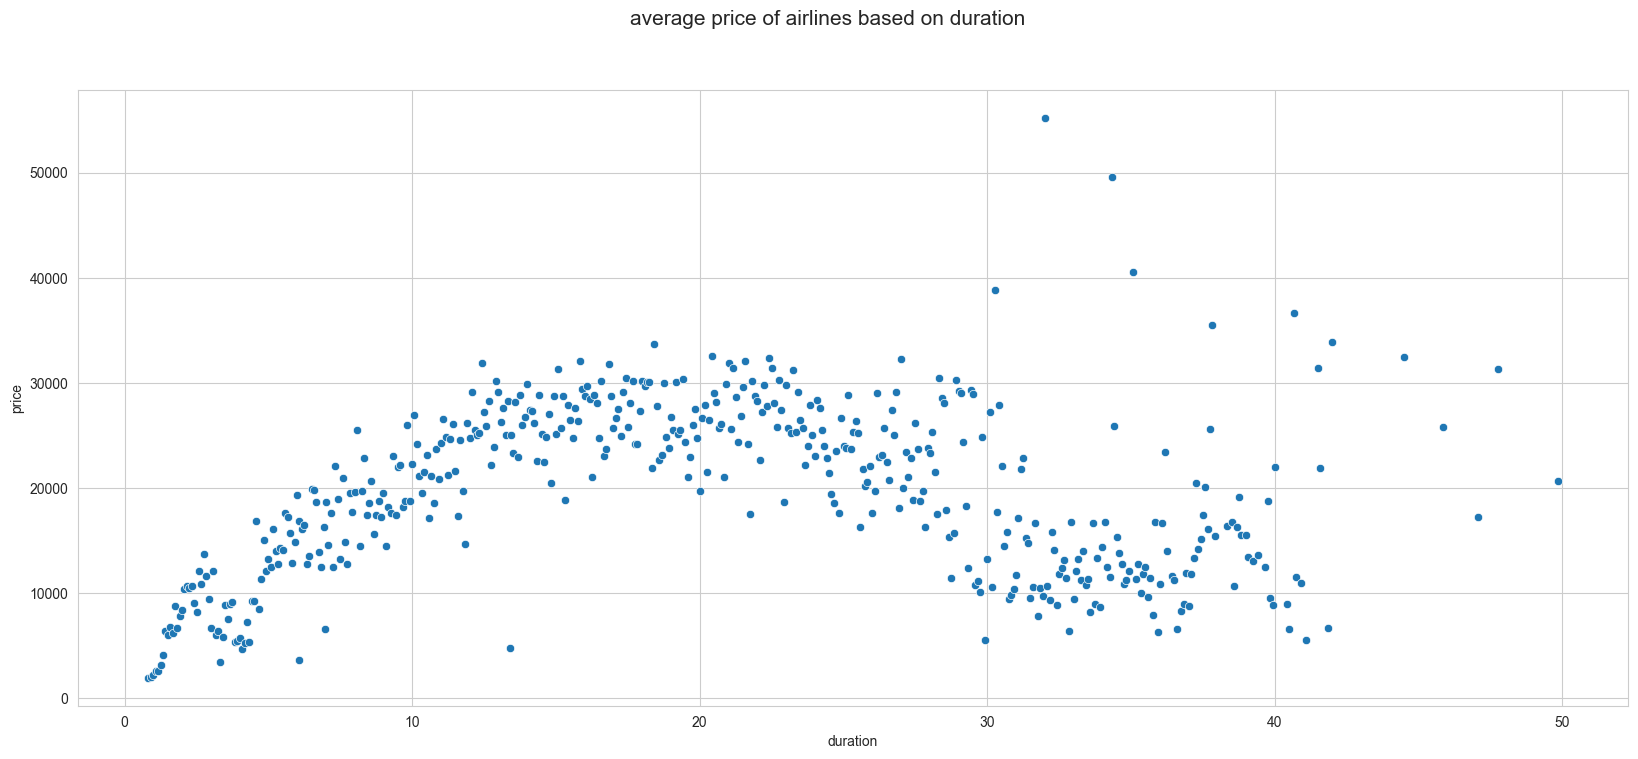

In [23]:
plt.figure(figsize = (20,8)).suptitle("average price of airlines based on duration", fontsize = 15)

sns.scatterplot(x='duration', y= "price", data = df_temp)
plt.show()

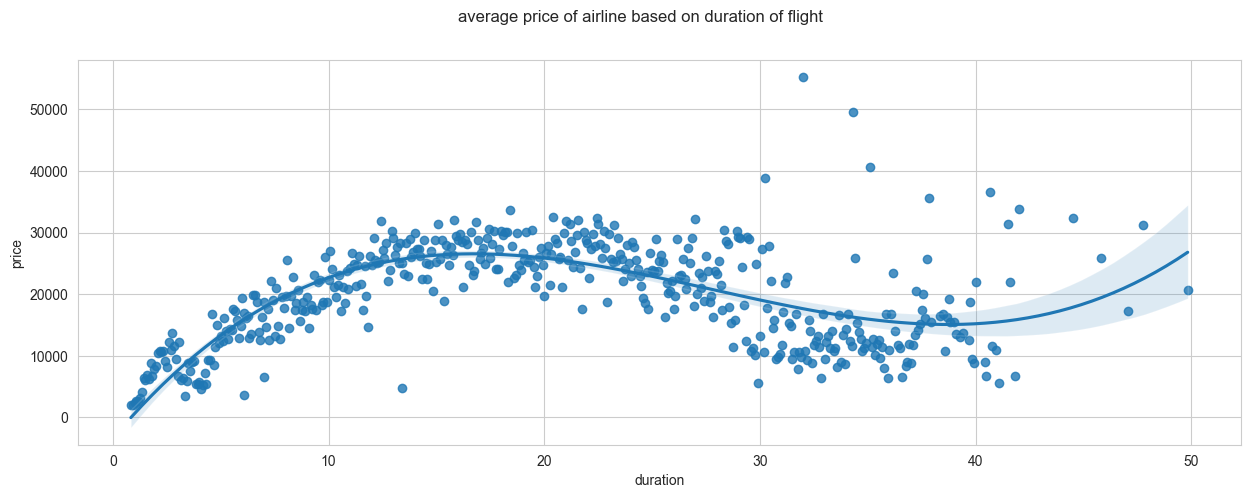

In [24]:
plt.figure(figsize=(15,5)).suptitle("average price of airline based on duration of flight")

#ax = sns.scatterplot( x = 'duration', y= 'price', data = df_temp)
ax = sns.regplot( x = 'duration', y= 'price', data = df_temp, order = 3) #three degree polynomial regression
plt.show()

📌 It clearly shows that line is not linear. Price is getting high as the duration increases and reaches at pick. Later it drops after 20 hours of duration.

### Does ticket price change based on Departure Time and Arrival Time

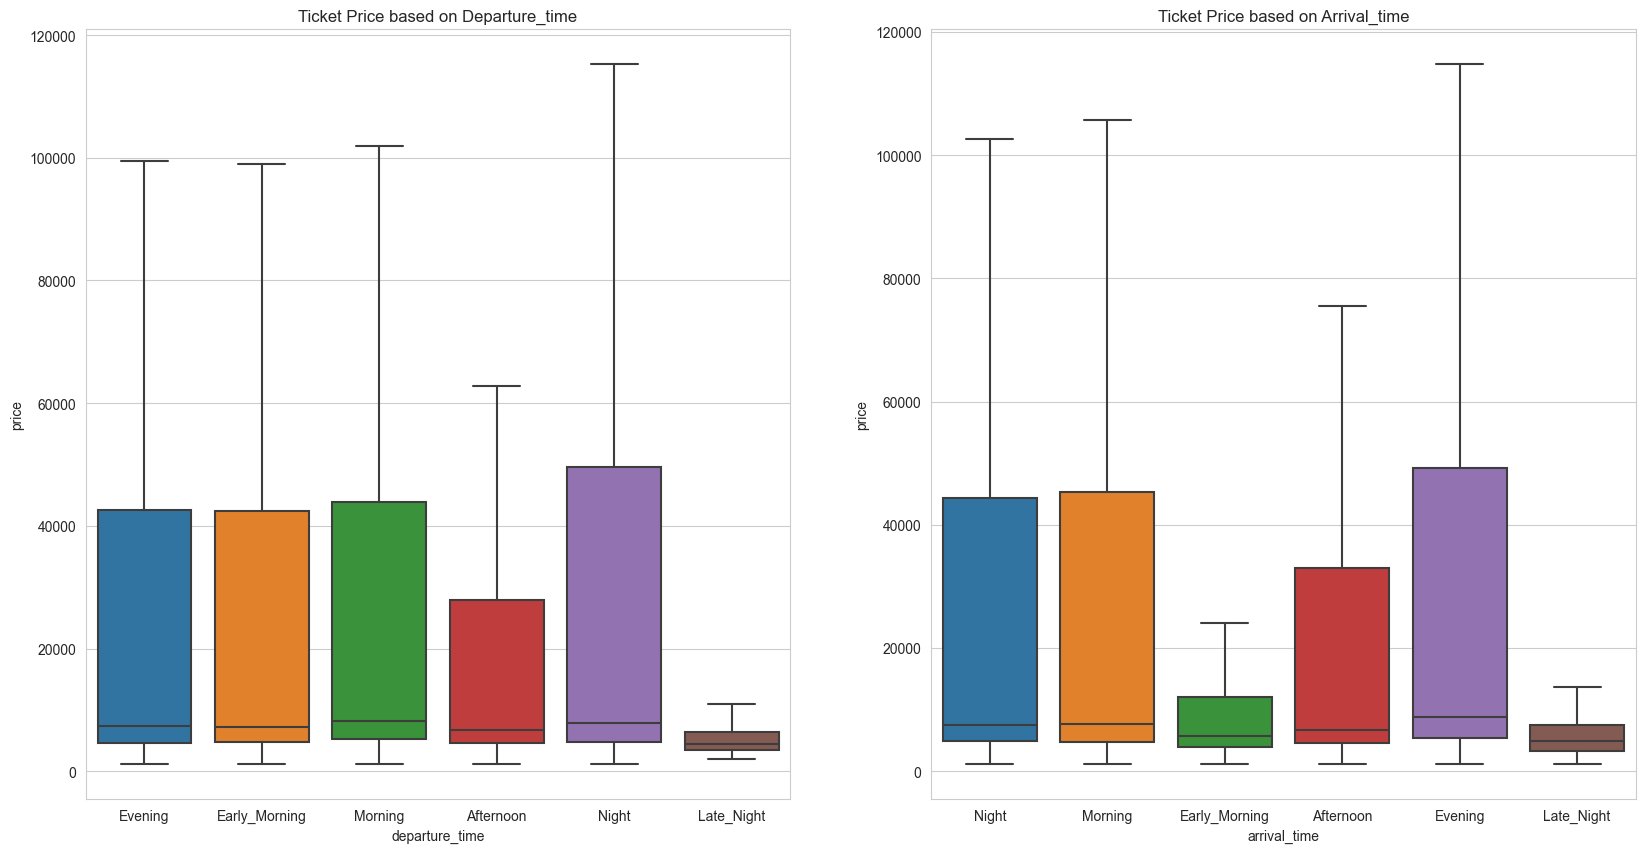

In [25]:
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
ax = sns.boxplot( x = 'departure_time', y = 'price', data =df, showfliers = False) #showfliers = False to avoid outiliers
ax.set_title("Ticket Price based on Departure_time")

plt.subplot(1,2,2)
ax1= sns.boxplot( x = 'arrival_time', y = 'price', data =df, showfliers = False) #showfliers = False to avoid outiliers
ax1.set_title("Ticket Price based on Arrival_time")

plt.show()

📌 It clearly shows that late_night ticket price both departure and arrival is lower. Airline ticket at Night for departure has high demand and the price sometimes higher compare to others. It shows same response in case of arrival_time but for Evening time.

### How price changes with a change in source and destination?

<Figure size 1500x2000 with 0 Axes>

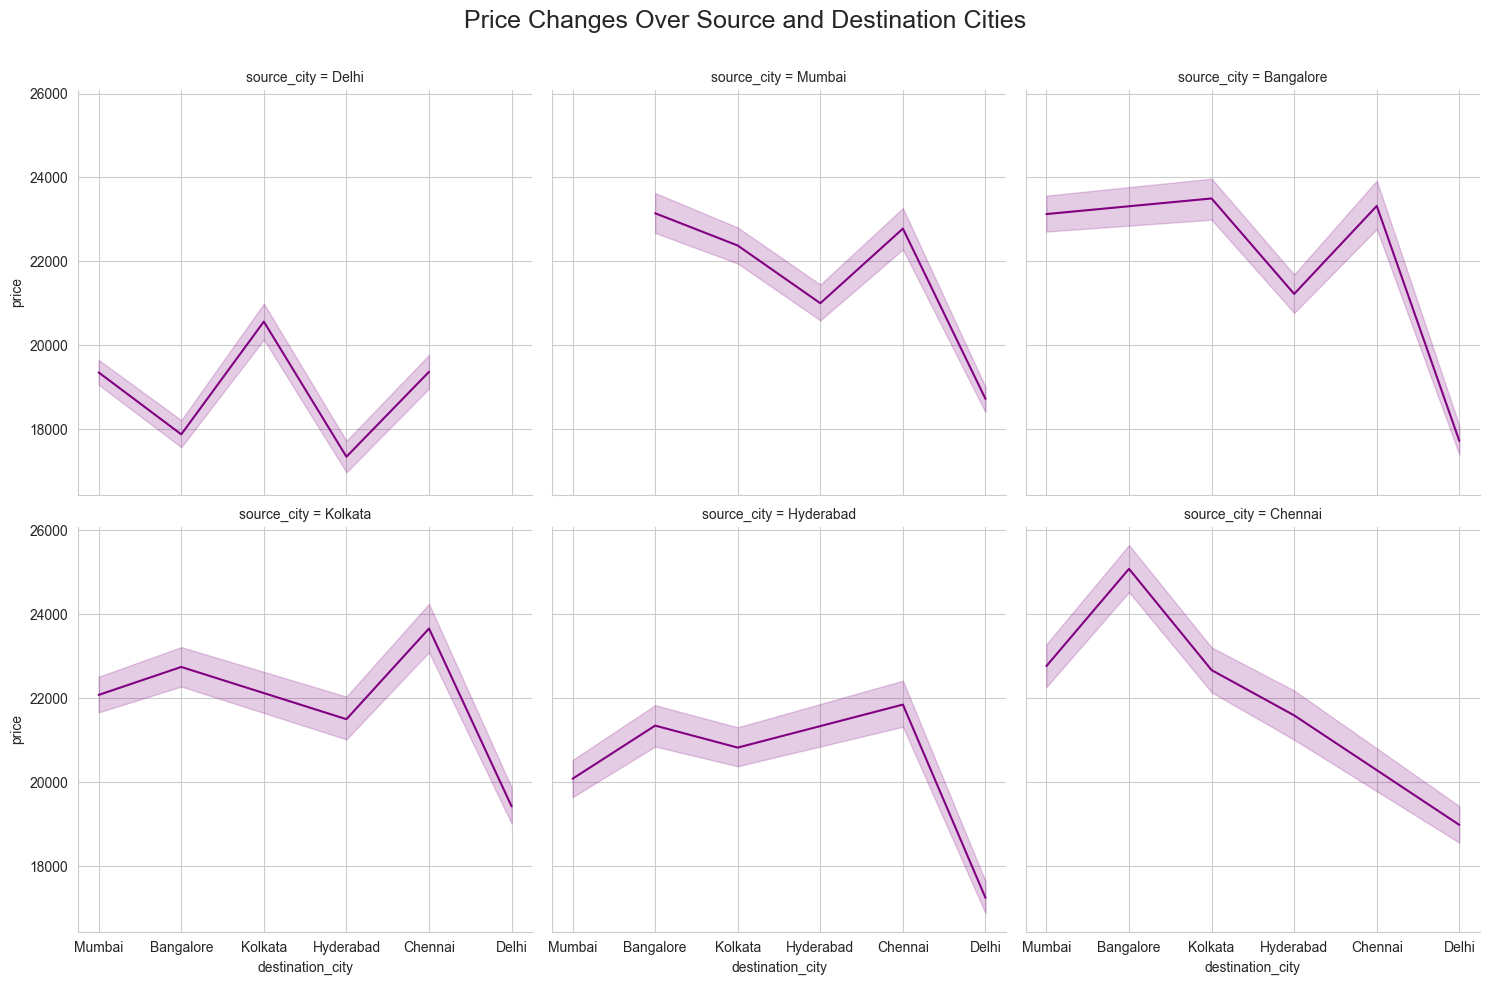

In [26]:
plt.figure(figsize = (15, 20))

ax = sns.relplot(col = 'source_city', x = 'destination_city', y = 'price', 
                 kind = 'line', data =df,
                 col_wrap = 3, color = 'purple')
ax.fig.subplots_adjust(top = 0.9)
ax.fig.suptitle("Price Changes Over Source and Destination Cities", fontsize = 18)
plt.show()

📌Delhi flight cost is lower as a destination/source city from most of the source city. Reason might be the capital city or large airport. Moreover, it can be situated in a good position geographically from other cities. Apart from Delhi, Hyderabad is showecasing lower price for most of the cities.

### Does number of stops influce the prices?

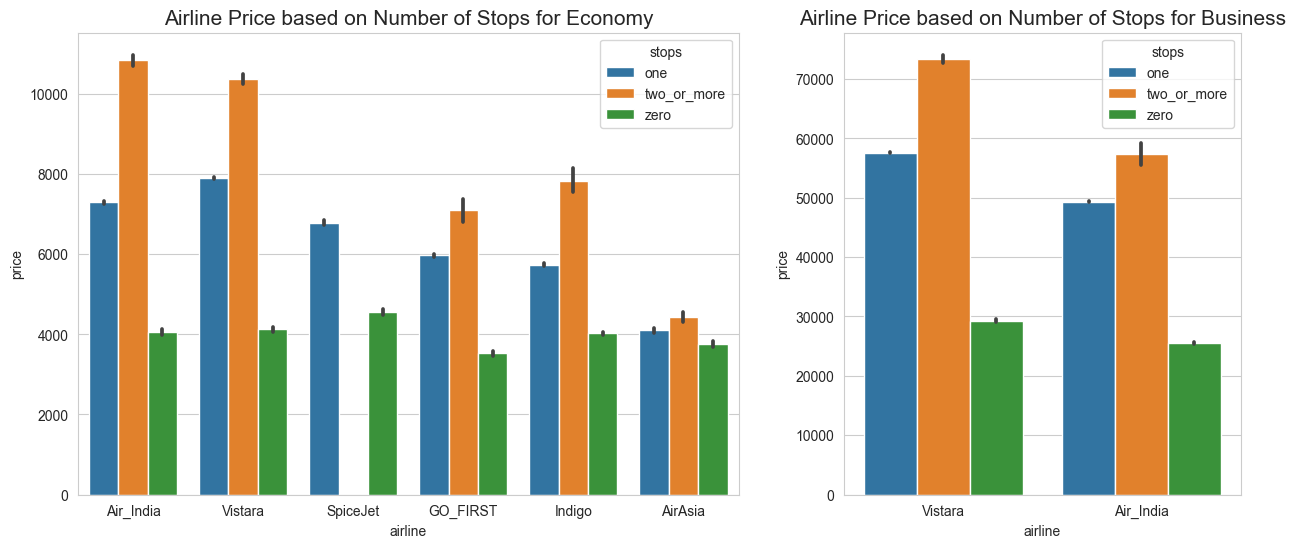

In [27]:
fig, axs = plt.subplots(1, 2, gridspec_kw= {'width_ratios': [5,3]}, figsize = (15,6))
sns.barplot( x = 'airline', y = 'price', hue = 'stops', 
            data = df.loc[df['class']=='Economy'].sort_values('price', ascending = False),
            ax = axs[0])
axs[0].set_title("Airline Price based on Number of Stops for Economy", fontsize = 15)

sns.barplot( x = 'airline', y = 'price', hue = 'stops', 
            data = df.loc[df['class']=='Business'].sort_values('price', ascending = False),
            ax = axs[1])
axs[1].set_title("Airline Price based on Number of Stops for Business", fontsize = 15)

plt.show()


📌Airline price is lower for zero stops in both Economy and Business Class. Price is consistent in case of AirAsia with respect to stops and cost is also cheapest

### What variable influnces most the price?

using correlation

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [8]:
def preprocessing(df):

    #ordinal numerical conversion

    stops_dict = {'zero' : 0, 'one' : 1, 'two_or_more' : 2}
    df['stops'] = df['stops'].replace(stops_dict).astype(int)
    
    class_dict = {'Economy' : 0, 'Business' : 1}
    df['class'] = df['class'].replace(class_dict).astype(int)

    #onehot encoding using dummy variable
    dummies_variable = ['airline', 'source_city', 'departure_time', 'arrival_time', 'destination_city']
    dummies = pd.get_dummies(df[dummies_variable], drop_first= True).astype(int)

    df = pd.concat([df, dummies], axis = 1) #coloumnwise

    #drop the columns which have already encoded
    df = df.drop(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time', 'arrival_time', 'destination_city'], axis = 1)
    return df

In [9]:
df_preprocessed = preprocessing(df)
df_preprocessed

,stops,class,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,...,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,0,0,2.17,1,5953,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,2.33,1,5953,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,2.75,1,5956,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,0,2.25,1,5955,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,2.33,1,5955,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
300149,1,1,10.42,49,77105,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
300150,1,1,13.83,49,79099,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
300151,1,1,10.00,49,81585,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0


In [6]:
df_preprocessed.corr()

,stops,class,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,...,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
stops,1.000000,0.001027,0.468059,-0.008540,0.119648,0.060215,-0.033363,-0.172133,-0.087293,0.098758,...,-0.018657,0.070912,-0.018544,-0.045666,0.017965,0.060865,-0.104565,0.029073,0.062722,-0.046849
class,0.001027,1.000000,0.138710,-0.013039,0.937860,0.124899,-0.194540,-0.275477,-0.118325,0.302116,...,-0.041974,0.032833,-0.086238,0.039745,0.008035,0.012331,-0.021200,0.007564,-0.012987,0.010573
duration,0.468059,0.138710,1.000000,-0.039157,0.204222,0.277283,-0.139380,-0.365953,0.008776,0.132430,...,0.010950,0.033094,-0.107301,0.122906,-0.064458,0.061271,-0.115412,0.065762,0.061440,-0.043900
days_left,-0.008540,-0.013039,-0.039157,1.000000,-0.091949,-0.022721,0.030408,0.007839,-0.024414,-0.007002,...,0.020204,-0.013737,0.026500,-0.003619,-0.004593,0.000456,0.006233,-0.000018,-0.003840,-0.004337
price,0.119648,0.937860,0.204222,-0.091949,1.000000,0.070041,-0.194179,-0.280882,-0.114019,0.360816,...,-0.060449,0.056408,-0.093602,0.030379,0.020344,0.018473,-0.052527,-0.008292,0.020956,0.010533
airline_Air_India,0.060215,0.124899,0.277283,-0.022721,0.070041,1.000000,-0.175687,-0.248781,-0.106858,-0.523242,...,-0.025510,-0.040356,-0.059937,0.066735,-0.001920,0.005760,-0.017354,0.010900,-0.006201,0.042490
airline_GO_FIRST,-0.033363,-0.194540,-0.139380,0.030408,-0.194179,-0.175687,1.000000,-0.118471,-0.050886,-0.249171,...,0.085654,-0.043881,0.100450,-0.063926,-0.000382,-0.059581,0.034305,-0.025814,-0.001016,0.026916
airline_Indigo,-0.172133,-0.275477,-0.365953,0.007839,-0.280882,-0.248781,-0.118471,1.000000,-0.072057,-0.352838,...,0.013864,0.007335,0.065025,-0.082781,-0.009271,0.018089,-0.002593,0.000244,0.033801,-0.031242
airline_SpiceJet,-0.087293,-0.118325,0.008776,-0.024414,-0.114019,-0.106858,-0.050886,-0.072057,1.000000,-0.151553,...,0.022834,-0.042162,0.003302,0.030808,0.013312,-0.002283,0.040668,-0.050272,0.029817,-0.000058
airline_Vistara,0.098758,0.302116,0.132430,-0.007002,0.360816,-0.523242,-0.249171,-0.352838,-0.151553,1.000000,...,-0.058766,0.091317,-0.135247,0.030260,0.024874,0.027766,-0.038389,0.035434,-0.030555,-0.016810


To visualize the linear relation between variables using correlation matrix

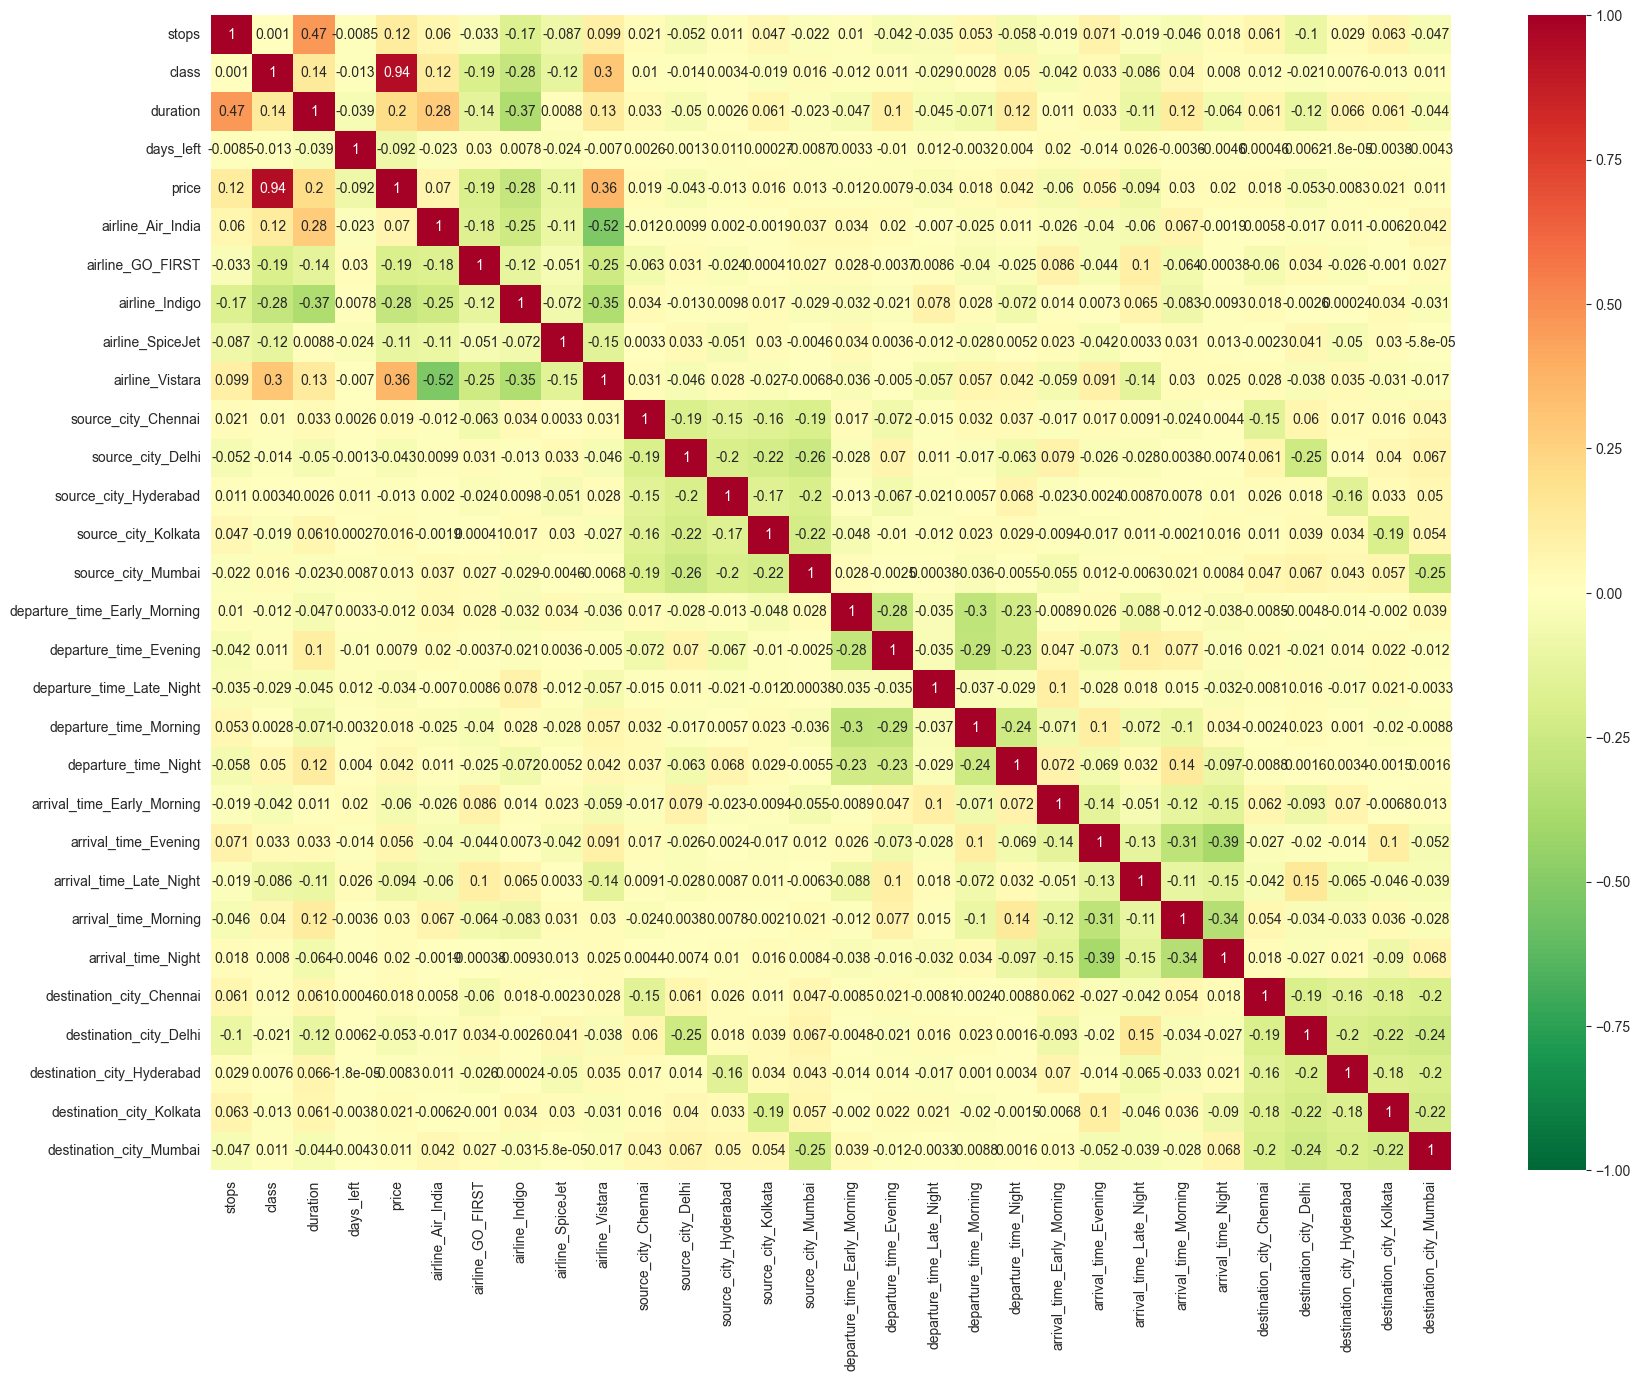

<Figure size 640x480 with 0 Axes>

In [7]:
plt.figure(figsize=(20,15))
#cmap = sns.diverging_palette(230, 30, as_cmap=True)
sns.heatmap(df_preprocessed.corr(), annot = True,
            vmin = -1.0, vmax = 1.0, center = 0, cmap = 'RdYlGn_r')
plt.show()
plt.savefig('heatmap.png', dpi=600, bbox_inches='tight')

### Build Basic Model without any preprocessing and feature engineering

In [8]:
df_preprocessed

,stops,class,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,...,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,0,0,2.17,1,5953,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,2.33,1,5953,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,2.17,1,5956,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,0,2.25,1,5955,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,2.33,1,5955,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
300149,1,1,10.42,49,77105,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
300150,1,1,13.83,49,79099,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
300151,1,1,10.00,49,81585,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0


In [9]:
df_preprocessed.columns

Index(['stops', 'class', 'duration', 'days_left', 'price', 'airline_Air_India',
       'airline_GO_FIRST', 'airline_Indigo', 'airline_SpiceJet',
       'airline_Vistara', 'source_city_Chennai', 'source_city_Delhi',
       'source_city_Hyderabad', 'source_city_Kolkata', 'source_city_Mumbai',
       'departure_time_Early_Morning', 'departure_time_Evening',
       'departure_time_Late_Night', 'departure_time_Morning',
       'departure_time_Night', 'arrival_time_Early_Morning',
       'arrival_time_Evening', 'arrival_time_Late_Night',
       'arrival_time_Morning', 'arrival_time_Night',
       'destination_city_Chennai', 'destination_city_Delhi',
       'destination_city_Hyderabad', 'destination_city_Kolkata',
       'destination_city_Mumbai'],
      dtype='object')

In [10]:
#features
X = df_preprocessed
#target
y = X.pop('price')

In [20]:
#pip install catboost

In [11]:
#import libaries

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)



In [17]:
#import libaries for build model
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor

#model evaluation
from sklearn.metrics import mean_absolute_error





In [18]:
models = {}
models["LinearRegression"]={"model":LinearRegression()}
models["KNeighborsRegressor"]={"model":KNeighborsRegressor()}
models["XGBRegressor"]={"model":XGBRegressor()}
models["CatBoostRegressor"]={"model":CatBoostRegressor()}

In [19]:
models

{'LinearRegression': {'model': LinearRegression()},
 'KNeighborsRegressor': {'model': KNeighborsRegressor()},
 'XGBRegressor': {'model': XGBRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=None, ...)},
 'CatBoostRegressor': {'model': <catboost.core.CatBoostRegressor at 0x198a4213a00>}}

In [20]:
models.items()

dict_items([('LinearRegression', {'model': LinearRegression()}), ('KNeighborsRegressor', {'model': KNeighborsRegressor()}), ('XGBRegressor', {'model': XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)}), ('CatBoostRegressor', {'model': <catboost.core.CatBoostRegressor object at 0x00000198A4213A00>})])

In [27]:
for name, model in models.items():
  
    #print(model)
    trained_model = model["model"].fit(X_train, y_train)
    y_pred = trained_model.predict(X_test)


    mae = mean_absolute_error(y_test, y_pred)
    print("---" +name+ "---")

    

    print(f"mean absolute error : {mae}")

   
   

---LinearRegression---
mean absolute error : 4491.252924436298
---KNeighborsRegressor---
mean absolute error : 7602.509350169078
---XGBRegressor---
mean absolute error : 1996.5657553350854
Learning rate set to 0.097339
0:	learn: 20656.7349469	total: 272ms	remaining: 4m 31s
1:	learn: 18804.5401969	total: 337ms	remaining: 2m 48s
2:	learn: 17144.9790257	total: 399ms	remaining: 2m 12s
3:	learn: 15667.8682072	total: 465ms	remaining: 1m 55s
4:	learn: 14347.2689055	total: 645ms	remaining: 2m 8s
5:	learn: 13163.7407181	total: 784ms	remaining: 2m 9s
6:	learn: 12130.8762172	total: 843ms	remaining: 1m 59s
7:	learn: 11205.3676874	total: 951ms	remaining: 1m 57s
8:	learn: 10383.0581753	total: 1.02s	remaining: 1m 52s
9:	learn: 9661.1439547	total: 1.11s	remaining: 1m 50s
10:	learn: 9032.1641265	total: 1.17s	remaining: 1m 44s
11:	learn: 8476.3810411	total: 1.27s	remaining: 1m 44s
12:	learn: 7987.1153302	total: 1.35s	remaining: 1m 42s
13:	learn: 7567.4093850	total: 1.44s	remaining: 1m 41s
14:	learn: 720

### Applying Different Approach OHE and Yeojhonson

### Quick Quality Check

In [28]:
#data
df.head(5)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.75,1,5956
3,3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955


In [29]:
df.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

In [30]:
#check unique values
df.source_city.unique()

array(['Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai'],
      dtype=object)

In [31]:
#check unique values
df.destination_city.unique()

array(['Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai', 'Delhi'],
      dtype=object)

In [32]:
#check unique values
df.days_left.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
      dtype=int64)

In [34]:
#check unique values
df.airline.unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

In [35]:
#check unique values
df.flight.unique()

array(['SG-8709', 'SG-8157', 'I5-764', ..., '6E-7127', '6E-7259',
       'AI-433'], dtype=object)

In [36]:
#count the total no of unique value of flight
len(df.flight.unique())

1561

seems to be contineous/numerical value not categorical

In [37]:
#price check (either there is any negative or not. price couldn't be negative)
df[df['price']<0]

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price


sometimes we may see mistake in splelling, sort form like (DLH/Delhi), we need to replace those repeated data.

In [38]:
#check null value
df.isna().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [39]:
#check duplicate value
df.duplicated().sum()

0

### Model performance using feature engineering

In [55]:
def preprocessing(df):

    #ordinal numerical conversion

    stops_dict = {'zero' : 0, 'one' : 1, 'two_or_more' : 2}
    df['stops'] = df['stops'].replace(stops_dict).astype(int)
    
    class_dict = {'Economy' : 0, 'Business' : 1}
    df['class'] = df['class'].replace(class_dict).astype(int)

    #onehot encoding using dummy variable
    dummies_variable = ['airline', 'source_city', 'departure_time', 'arrival_time', 'destination_city']
    dummies = pd.get_dummies(df[dummies_variable], drop_first= True).astype(int)

    df = pd.concat([df, dummies], axis = 1) #coloumnwise

    #drop the columns which have already encoded
    df = df.drop(['Unnamed: 0', 'airline', 'flight', 'source_city', 
                  'departure_time', 'arrival_time', 'destination_city'], axis = 1)
    return df

In [56]:
df_processed = preprocessing(df)
df_processed

,stops,class,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,...,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,0,0,2.17,1,5953,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,2.33,1,5953,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,2.75,1,5956,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,0,2.25,1,5955,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,2.33,1,5955,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
300149,1,1,10.42,49,77105,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
300150,1,1,13.83,49,79099,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
300151,1,1,10.00,49,81585,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0


In [43]:
#check unique value of each cols
for i in df_processed.columns:
    if df_processed[i].nunique()>3:
        print(i, df_processed[i].nunique())


duration 476
days_left 49
price 12157


In [44]:
df_processed['duration'].astype

<bound method NDFrame.astype of 0          2.17
1          2.33
2          2.75
3          2.25
4          2.33
          ...  
300148    10.08
300149    10.42
300150    13.83
300151    10.00
300152    10.08
Name: duration, Length: 300153, dtype: float64>

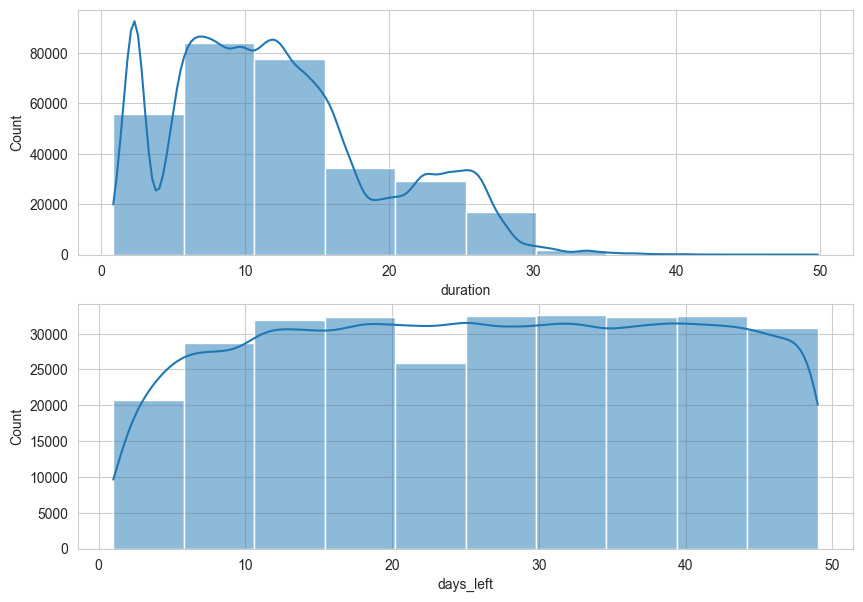

In [45]:
#plot distribution

plt.figure(figsize=(10,7))
plt.subplot(2, 1, 1)
sns.histplot(df_processed['duration'], kde=True, bins= 10) # type: ignore # type: ignore

plt.subplot(2, 1, 2)
sns.histplot(df_processed['days_left'], kde=True, bins= 10) # type: ignore

plt.show()


both cases distribution is not normal. 

In [109]:
df_processed.days_left.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
      dtype=int64)

In [46]:
# forcefully normalize the not normalized columns
df_features = df_processed.copy()
from scipy.stats import yeojohnson

#plot distribution

for idx, col in enumerate(['duration', 'days_left']):
    y, lmbda = yeojohnson(df_features[col])

    df_features[col] = y
    print(y)

[1.49488464 1.57673292 1.78147836 ... 5.0995663  4.20283675 4.22324801]
[ 0.9206801   0.9206801   0.9206801  ... 26.09675681 26.09675681
 26.09675681]


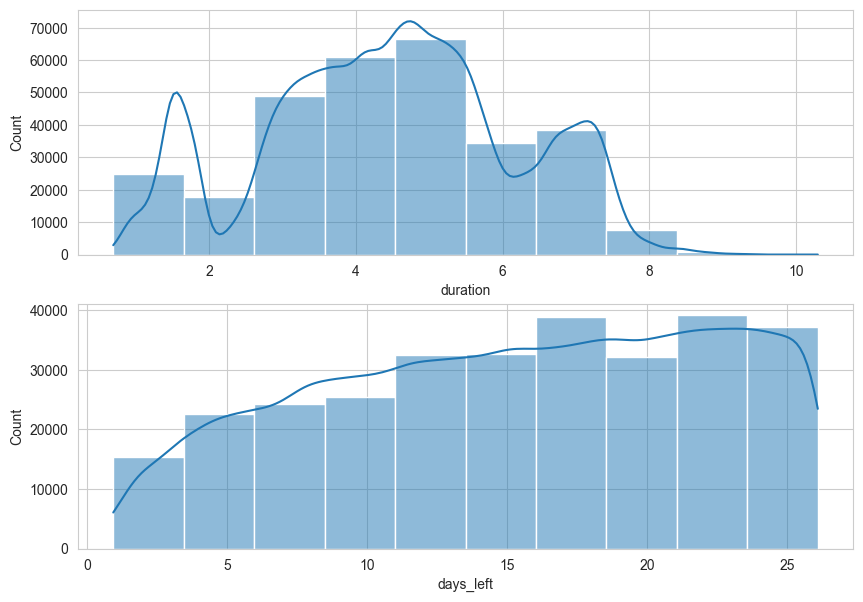

In [47]:
plt.figure(figsize=(10,7))

for idx, col in enumerate(['duration', 'days_left']):
    y, lmbda =yeojohnson(df_features[col])

    plt.subplot(2, 1, idx+1)
    sns.histplot(df_features[col], kde=True, bins=10)  # type: ignore

plt.show()



### Create function for models

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error

#mlflow for experimental tracking
import mlflow
from mlflow import log_metric, log_param, log_params, log_artifacts
#to save model using pickle
import pickle

#create funcation for models to evaluate mae
def test_mae(df):
    #mlflow local host integration
    TRACKING_SERVER_HOST = 'localhost'
    mlflow.set_tracking_uri(f"http://{TRACKING_SERVER_HOST}:5000")
    #set experment name
    mlflow.set_experiment(experiment_name= 'airlines-eda-basic-ml-V1')
    X = df.copy()
    y = X.pop("price")

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, 
                                            random_state = 42, shuffle= True )
    
    models = {}

    models['LinearRegression'] = {"model" : LinearRegression()}
    models['XGBRegressor'] = {"model" : XGBRegressor()}
    models["KNeighborsRegressor"] = {"model" : KNeighborsRegressor()}
    models["CatBoostRegressor"] = {"model" : CatBoostRegressor()}

    #mlflow 
    TRACKING_SERVER_HOST = 'localhost'
    mlflow.set_tracking_uri(f"http://{TRACKING_SERVER_HOST}:5000")

    for name, model in models.items():
        #mlflow start run
        with mlflow.start_run():
            #mlflow log_param start
            log_param('model_name', name)
            log_param('one-hot-encoding', True )
            log_param('transformer', 'yeojhonson')
            #mlflow log_param end
            trained_model = model['model'].fit(X_train, y_train)
            y_pred = trained_model.predict(X_test)
            mae = mean_absolute_error(y_test, y_pred)
            #mlflow log_metric start
            log_metric('mae', mae)
            #mlflow log_metric end
            print("----"+name+"----")
            print(f"mean_absolute_error: {mae}")
            #mlflow end run
            mlflow.end_run()
            #To save model using pickel
            #filename = model/name
            #pickle.dump(trained_model, open(filename, 'wb'))

            #mlflow log_artifacts start
            #log_artifacts()
            #mlflow log_artifacts end
            
        

In [78]:
df_features = df_processed.copy()

#we only apply yoejohnson on "duration". day_left doesn't work well
col = "duration"

y, _ = yeojohnson(df_features[col])
df_features[col] = y
test_mae(df_features)

----LinearRegression----
mean_absolute_error: 4509.729122701959
----XGBRegressor----
mean_absolute_error: 2029.6668482181155
----KNeighborsRegressor----
mean_absolute_error: 5849.802982919841
Learning rate set to 0.095307
0:	learn: 20684.1587192	total: 64.5ms	remaining: 1m 4s
1:	learn: 18866.2795192	total: 127ms	remaining: 1m 3s
2:	learn: 17233.4583675	total: 180ms	remaining: 59.9s
3:	learn: 15776.1290567	total: 229ms	remaining: 57.1s
4:	learn: 14469.8030679	total: 280ms	remaining: 55.8s
5:	learn: 13296.0104661	total: 330ms	remaining: 54.6s
6:	learn: 12265.0852216	total: 383ms	remaining: 54.3s
7:	learn: 11340.9027522	total: 444ms	remaining: 55.1s
8:	learn: 10517.4187403	total: 500ms	remaining: 55s
9:	learn: 9791.7759086	total: 561ms	remaining: 55.6s
10:	learn: 9157.4903461	total: 663ms	remaining: 59.6s
11:	learn: 8595.1970836	total: 717ms	remaining: 59s
12:	learn: 8105.5964222	total: 769ms	remaining: 58.4s
13:	learn: 7676.1937943	total: 828ms	remaining: 58.3s
14:	learn: 7304.6654392	to

📌 After applying yeojoshon on duration, mae doesn't improve that much

### Apply Standard Scaler and evaluate performance

In [61]:
from sklearn.preprocessing import StandardScaler
df_features = df_processed.copy()

cols = ['duration', 'days_left']

df_features[cols] = StandardScaler().fit_transform(df_features[cols])
test_mae(df_features)

----LinearRegression----
mean_absolute_error: 4487.942820422314
----XGBRegressor----
mean_absolute_error: 2033.346978171145
----KNeighborsRegressor----
mean_absolute_error: 1880.649690158364
Learning rate set to 0.095307
0:	learn: 20684.1587192	total: 75.4ms	remaining: 1m 15s
1:	learn: 18866.2795192	total: 164ms	remaining: 1m 21s
2:	learn: 17233.4583675	total: 274ms	remaining: 1m 30s
3:	learn: 15776.1290567	total: 445ms	remaining: 1m 50s
4:	learn: 14469.8030679	total: 546ms	remaining: 1m 48s
5:	learn: 13296.0104661	total: 697ms	remaining: 1m 55s
6:	learn: 12265.0852216	total: 995ms	remaining: 2m 21s
7:	learn: 11340.9027522	total: 1.09s	remaining: 2m 14s
8:	learn: 10517.4187403	total: 1.15s	remaining: 2m 6s
9:	learn: 9791.7759086	total: 1.24s	remaining: 2m 2s
10:	learn: 9157.4903461	total: 1.3s	remaining: 1m 56s
11:	learn: 8595.1970836	total: 1.37s	remaining: 1m 53s
12:	learn: 8105.5964222	total: 1.42s	remaining: 1m 47s
13:	learn: 7676.1937361	total: 1.54s	remaining: 1m 48s
14:	learn: 7

📌 KNN shows massive improvement in result after standardizing the duration and days_left coloumns. As we know that KNN produces result based on distance measurement. 

### Apply Data Binning based visualazation pattern of days_left

In [142]:
df_features = df_processed.copy()

In [143]:
df_features['days_left'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
      dtype=int64)

In [144]:
#
cut_labels = ['one_day', '2-19', '20-50']
cut_bins = [0, 1, 20, 50]

df_features['days_left_binning'] = pd.cut(df_features['days_left'], bins= cut_bins, labels=cut_labels)
print("total number of dataset : {}".format(df_features['days_left_binning'].value_counts().sum()))
df_features[['days_left', 'days_left_binning']]

total number of dataset : 300153


,days_left,days_left_binning
0,1,one_day
1,1,one_day
2,1,one_day
3,1,one_day
4,1,one_day
...,...,...
300148,49,20-50
300149,49,20-50
300150,49,20-50
300151,49,20-50


In [145]:
dummies = pd.get_dummies(df_features['days_left_binning'], drop_first = True).astype(int)
df_features = pd.concat([df_features, dummies], axis=1)
df_features.drop(['days_left', 'days_left_binning'], axis=1, inplace= True)
df_features

,stops,class,duration,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,...,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,2-19,20-50
0,0,0,2.17,5953,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
1,0,0,2.33,5953,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
2,0,0,2.17,5956,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,2.25,5955,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,2.33,5955,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,69265,0,0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,1
300149,1,1,10.42,77105,0,0,0,0,1,1,...,0,0,1,0,0,1,0,0,0,1
300150,1,1,13.83,79099,0,0,0,0,1,1,...,0,0,1,0,0,1,0,0,0,1
300151,1,1,10.00,81585,0,0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,1


In [146]:
test_mae(df_features)

----LinearRegression----
mean_absolute_error: 4510.199603989691
----XGBRegressor----
mean_absolute_error: 2244.3034631224023
----KNeighborsRegressor----
mean_absolute_error: 1934.3421517890854
Learning rate set to 0.095307
0:	learn: 20694.2431020	total: 71.5ms	remaining: 1m 11s
1:	learn: 18886.4766143	total: 139ms	remaining: 1m 9s
2:	learn: 17266.7224030	total: 237ms	remaining: 1m 18s
3:	learn: 15821.3145918	total: 301ms	remaining: 1m 14s
4:	learn: 14527.5607501	total: 354ms	remaining: 1m 10s
5:	learn: 13376.6920369	total: 402ms	remaining: 1m 6s
6:	learn: 12356.5626327	total: 453ms	remaining: 1m 4s
7:	learn: 11432.8140406	total: 519ms	remaining: 1m 4s
8:	learn: 10624.9708124	total: 574ms	remaining: 1m 3s
9:	learn: 9912.6170453	total: 619ms	remaining: 1m 1s
10:	learn: 9280.2449040	total: 671ms	remaining: 1m
11:	learn: 8728.1076093	total: 733ms	remaining: 1m
12:	learn: 8240.6686446	total: 785ms	remaining: 59.6s
13:	learn: 7806.9134569	total: 841ms	remaining: 59.2s
14:	learn: 7439.4951761

📌 days_left doesn't play in greater role in that. Error doesn't improve.

In [147]:
test_mae(df_features.drop(['20-50'], axis =1))

----LinearRegression----
mean_absolute_error: 4547.204004037111
----XGBRegressor----
mean_absolute_error: 2313.156282029799
----KNeighborsRegressor----
mean_absolute_error: 1902.9625013881791
Learning rate set to 0.095307
0:	learn: 20691.6776846	total: 212ms	remaining: 3m 31s
1:	learn: 18916.9220181	total: 292ms	remaining: 2m 25s
2:	learn: 17290.6907196	total: 345ms	remaining: 1m 54s
3:	learn: 15837.6162423	total: 398ms	remaining: 1m 39s
4:	learn: 14538.3215964	total: 461ms	remaining: 1m 31s
5:	learn: 13376.2736462	total: 529ms	remaining: 1m 27s
6:	learn: 12348.2586168	total: 589ms	remaining: 1m 23s
7:	learn: 11434.3643068	total: 638ms	remaining: 1m 19s
8:	learn: 10632.2773360	total: 691ms	remaining: 1m 16s
9:	learn: 9918.7760352	total: 747ms	remaining: 1m 13s
10:	learn: 9287.4717033	total: 800ms	remaining: 1m 11s
11:	learn: 8739.8625337	total: 857ms	remaining: 1m 10s
12:	learn: 8258.4459222	total: 911ms	remaining: 1m 9s
13:	learn: 7842.9087967	total: 991ms	remaining: 1m 9s
14:	learn: 

### Cut bins by duration based on data visualization

In [155]:
df_features = df_processed.copy()

print("minimum duration: {} and maximum duration: {}"
      .format(min(df_features['duration']), max(df_features['duration'])))
cut_labels = ['before_20', 'after_20']
cut_bins = [0, 19, 60]

df_features['duration_binning'] = pd.cut(df_features['duration'], bins = cut_bins, labels= cut_labels)
df_features[['duration', 'duration_binning']]

minimum duration: 0.83 and maximum duration: 49.83


,duration,duration_binning
0,2.17,before_20
1,2.33,before_20
2,2.17,before_20
3,2.25,before_20
4,2.33,before_20
...,...,...
300148,10.08,before_20
300149,10.42,before_20
300150,13.83,before_20
300151,10.00,before_20


In [156]:
dummies = pd.get_dummies(df_features['duration_binning'], drop_first = True).astype(int)
df_features = pd.concat([df_features, dummies], axis = 1)
df_features = df_features.drop(['duration', 'duration_binning'], axis =1)
df_features

,stops,class,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,...,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,after_20
0,0,0,1,5953,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,1,5953,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,0,1,5956,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1,5955,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,5955,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,49,69265,0,0,0,0,1,1,...,1,0,0,0,0,0,1,0,0,0
300149,1,1,49,77105,0,0,0,0,1,1,...,0,0,0,1,0,0,1,0,0,0
300150,1,1,49,79099,0,0,0,0,1,1,...,0,0,0,1,0,0,1,0,0,0
300151,1,1,49,81585,0,0,0,0,1,1,...,1,0,0,0,0,0,1,0,0,0


In [157]:
test_mae(df_features)

----LinearRegression----
mean_absolute_error: 4502.221902639882
----XGBRegressor----
mean_absolute_error: 2257.6860306846584
----KNeighborsRegressor----
mean_absolute_error: 4997.106572196432
Learning rate set to 0.095307
0:	learn: 20686.0714219	total: 54.6ms	remaining: 54.6s
1:	learn: 18875.5403996	total: 103ms	remaining: 51.5s
2:	learn: 17248.8837079	total: 152ms	remaining: 50.6s
3:	learn: 15790.3764406	total: 218ms	remaining: 54.2s
4:	learn: 14490.3029329	total: 265ms	remaining: 52.7s
5:	learn: 13332.9110203	total: 306ms	remaining: 50.8s
6:	learn: 12306.0815488	total: 355ms	remaining: 50.4s
7:	learn: 11386.7360785	total: 411ms	remaining: 51s
8:	learn: 10571.7290120	total: 469ms	remaining: 51.7s
9:	learn: 9855.0931605	total: 519ms	remaining: 51.4s
10:	learn: 9217.7007147	total: 563ms	remaining: 50.6s
11:	learn: 8662.1240554	total: 611ms	remaining: 50.3s
12:	learn: 8165.3537004	total: 670ms	remaining: 50.9s
13:	learn: 7734.5422851	total: 724ms	remaining: 51s
14:	learn: 7369.2556119	to

📌 duration doesn't play any greater role in that dataset

### Combining Source and Destination Column

In [163]:
df_processed.columns

Index(['stops', 'class', 'duration', 'days_left', 'price', 'airline_Air_India',
       'airline_GO_FIRST', 'airline_Indigo', 'airline_SpiceJet',
       'airline_Vistara', 'source_city_Chennai', 'source_city_Delhi',
       'source_city_Hyderabad', 'source_city_Kolkata', 'source_city_Mumbai',
       'departure_time_Early_Morning', 'departure_time_Evening',
       'departure_time_Late_Night', 'departure_time_Morning',
       'departure_time_Night', 'arrival_time_Early_Morning',
       'arrival_time_Evening', 'arrival_time_Late_Night',
       'arrival_time_Morning', 'arrival_time_Night',
       'destination_city_Chennai', 'destination_city_Delhi',
       'destination_city_Hyderabad', 'destination_city_Kolkata',
       'destination_city_Mumbai'],
      dtype='object')

In [170]:


df_features = df_processed.copy()

#combining source_city destination_city columns
df_features['source_to_destination'] =  df.source_city + "_" + df.destination_city
dummies = pd.get_dummies(df_features['source_to_destination'], drop_first=True).astype(int)
df_features = pd.concat([df_features,dummies], axis = 1)
df_features = df_features.drop(['source_to_destination'], axis = 1)
df_features


,stops,class,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,...,Kolkata_Bangalore,Kolkata_Chennai,Kolkata_Delhi,Kolkata_Hyderabad,Kolkata_Mumbai,Mumbai_Bangalore,Mumbai_Chennai,Mumbai_Delhi,Mumbai_Hyderabad,Mumbai_Kolkata
0,0,0,2.17,1,5953,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,2.33,1,5953,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.17,1,5956,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,2.25,1,5955,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,2.33,1,5955,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
300149,1,1,10.42,49,77105,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
300150,1,1,13.83,49,79099,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
300151,1,1,10.00,49,81585,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [171]:
test_mae(df_features)

----LinearRegression----
mean_absolute_error: 4505.956395073421
----XGBRegressor----
mean_absolute_error: 1953.3652099006072
----KNeighborsRegressor----
mean_absolute_error: 10205.35172245297
Learning rate set to 0.095307
0:	learn: 20721.3471796	total: 54.7ms	remaining: 54.7s
1:	learn: 18904.8565997	total: 130ms	remaining: 1m 5s
2:	learn: 17282.0847944	total: 200ms	remaining: 1m 6s
3:	learn: 15824.9880084	total: 254ms	remaining: 1m 3s
4:	learn: 14517.8550764	total: 315ms	remaining: 1m 2s
5:	learn: 13354.9890863	total: 372ms	remaining: 1m 1s
6:	learn: 12334.2311233	total: 421ms	remaining: 59.8s
7:	learn: 11405.6326621	total: 484ms	remaining: 60s
8:	learn: 10582.9326092	total: 559ms	remaining: 1m 1s
9:	learn: 9855.1384690	total: 617ms	remaining: 1m 1s
10:	learn: 9216.1941955	total: 679ms	remaining: 1m 1s
11:	learn: 8656.9599672	total: 732ms	remaining: 1m
12:	learn: 8160.6823107	total: 794ms	remaining: 1m
13:	learn: 7728.7301604	total: 866ms	remaining: 1m
14:	learn: 7352.8636483	total: 94

📌 it shows most worst performance for KNN. After comparing all the feature engineering process, we can conclude standard scaler is doing best and KNN is showing better result out of other models

### Let's use Deep Learning Model. Basic ANN

In [173]:
df_features = df_processed.copy()
df_features.head()

,stops,class,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,...,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,0,0,2.17,1,5953,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,2.33,1,5953,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,2.17,1,5956,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,0,2.25,1,5955,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,2.33,1,5955,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1


In [174]:
cols = ['duration', 'days_left']

df_features[cols] = StandardScaler().fit_transform(df_features[cols])
df_features.head()

,stops,class,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,...,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,0,0,-1.397531,-1.843875,5953,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,-1.375284,-1.843875,5953,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,-1.397531,-1.843875,5956,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,0,-1.386407,-1.843875,5955,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,-1.375284,-1.843875,5955,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1


In [191]:
import tensorflow as tf
from tensorflow import keras
from tensorflow import keras
from keras import layers

In [186]:
#one column is for target variable
num = len(df_features.columns) - 1
num

29

In [204]:
def build_model(input_shape = num, output_shape = 1, activation = 'relu', nueron_count = 100 ):

    model = keras.Sequential([
        layers.Dense(nueron_count, activation = activation, input_shape = [input_shape]),
        layers.Dense(nueron_count, activation = activation),
        layers.Dense(nueron_count, activation = activation),
        layers.Dense(nueron_count, activation = activation),
        layers.Dense(nueron_count, activation = activation),
        layers.Dense(output_shape)

    ])

    #if there is no activation function, it will produce sum (weight*input + bias)
    #for regression, we use RMSprop as an optimizer. 
    #learning_rate is a rate of learning features and adjust the weight to acheive lowest cost value
    #good way to start 0.000001 to 0.00001

    optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.00001)

    model.compile(loss = 'mse', optimizer = optimizer, 
                  metrics = ['mae', 'mse'])
    
    return model

In [209]:
def test_ann(data, activation, Epochs_num = 10):

    X = data.copy()
    y = X.pop('price')

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, 
                                                        random_state= 42, shuffle= True)
    
    Epochs = Epochs_num
    print("no of epochs: {}".format(Epochs))
    #model features
    input_shape = X_train.shape[1]
    print("input_shape: {}".format(input_shape))

    model = build_model(input_shape = input_shape, activation = activation)

    print("------model summary------", "\n\n", model.summary())

    #train and plot mae vs val_mae
    history = model.fit(X_train, y_train, epochs = Epochs, validation_split = 0.1, verbose = 1) # type: ignore
    
    sns.lineplot(x = range(1, Epochs+1), y = history.history['mae'])
    sns.lineplot(x = range(1, Epochs+1), y = history.history['val_mae'])
    plt.show()

    #evaluate
    loss, mae, mse = model.evaluate(X_test, y_test, verbose = 1) # type: ignore
    print("----model evaluation report ----")
    print("Testing Data loss: {:.2f}, mean absolute error: {:.2f} and mean square error {:.2f}".
          format(loss, mae, mse))
    






no of epochs: 10
input_shape: 29
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 100)               3000      
                                                                 
 dense_37 (Dense)            (None, 100)               10100     
                                                                 
 dense_38 (Dense)            (None, 100)               10100     
                                                                 
 dense_39 (Dense)            (None, 100)               10100     
                                                                 
 dense_40 (Dense)            (None, 100)               10100     
                                                                 
 dense_41 (Dense)            (None, 1)                 101       
                                                                 
Total params: 43,501


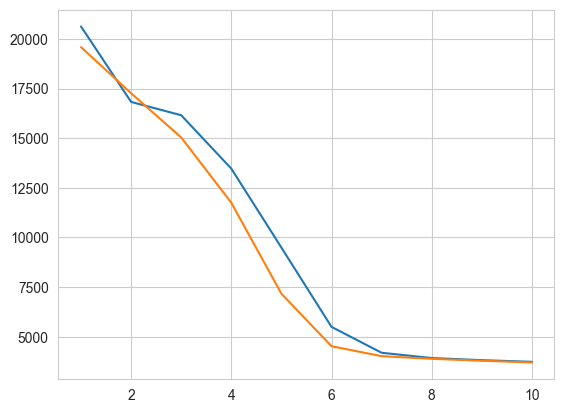

2814/2814 [==============================] - 11s 4ms/step - loss: 35319976.0000 - mae: 3680.4111 - mse: 35319976.0000
----model evaluation report ----
Testing Data loss: 35319976.00, mean absolute error: 3680.41 and mean square error 35319976.00
no of epochs: 10
input_shape: 29
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 100)               3000      
                                                                 
 dense_43 (Dense)            (None, 100)               10100     
                                                                 
 dense_44 (Dense)            (None, 100)               10100     
                                                                 
 dense_45 (Dense)            (None, 100)               10100     
                                                                 
 dense_46 (Dense)            (None, 100

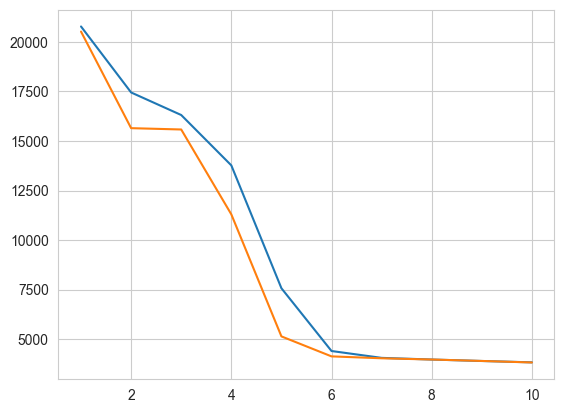

2814/2814 [==============================] - 10s 4ms/step - loss: 34865992.0000 - mae: 3780.3735 - mse: 34865992.0000
----model evaluation report ----
Testing Data loss: 34865992.00, mean absolute error: 3780.37 and mean square error 34865992.00
no of epochs: 10
input_shape: 29
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 100)               3000      
                                                                 
 dense_49 (Dense)            (None, 100)               10100     
                                                                 
 dense_50 (Dense)            (None, 100)               10100     
                                                                 
 dense_51 (Dense)            (None, 100)               10100     
                                                                 
 dense_52 (Dense)            (None, 100

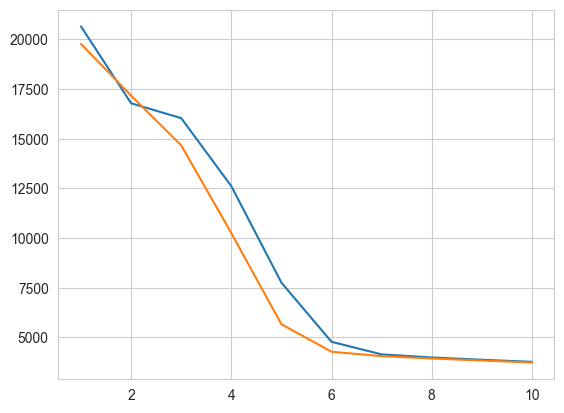

2814/2814 [==============================] - 9s 3ms/step - loss: 34256632.0000 - mae: 3712.1125 - mse: 34256632.0000
----model evaluation report ----
Testing Data loss: 34256632.00, mean absolute error: 3712.11 and mean square error 34256632.00


In [210]:
test_ann(df_features, 'relu')
test_ann(df_features, 'swish')
test_ann(df_features, 'leaky_relu')




### Outliers

find outlier of price based on classes ("Economic", "Business")

In [ ]:
df_features['class'].unique()

In [222]:
#for economy class
price = df_features[df_features['class']==0].price
lower_limit = price.mean() - 3*price.std()
upper_limit = price.mean() + 3*price.std()

print("----ECONOMY CLASS-----")
print("lower_limit: {:.3f}".format(lower_limit))
print("upper_limit: {:.3f}".format(upper_limit))

class_eco = df_features[(df_features['class']==0) &
                        (df_features['price'] >= lower_limit) &
                        (df_features['price'] <= upper_limit)].index

#for business class
price = df_features[df_features['class']==1].price
lower_limit = price.mean() - 3*price.std()
upper_limit = price.mean() + 3*price.std()

print("----BUSINESS CLASS-----")
print("lower_limit: {:.3f}".format(lower_limit))
print("upper_limit: {:.3f}".format(upper_limit))

class_bsn = df_features[(df_features['class']==1) &
                        (df_features['price'] >= lower_limit) &
                        (df_features['price'] <= upper_limit)].index


----ECONOMY CLASS-----
lower_limit: -4658.216
upper_limit: 17802.901
----BUSINESS CLASS-----
lower_limit: 13632.137
upper_limit: 91448.025


In [224]:
print("minimum price over whole dataset: {:.4f}".format(df_features['price'].min()))
print("maximum price over whole dataset: {:.4f}".format(df_features['price'].max()))

minimum price over whole dataset: 1105.0000
maximum price over whole dataset: 123071.0000


In [223]:
class_eco

Index([     0,      1,      2,      3,      4,      5,      6,      7,      8,
            9,
       ...
       206656, 206657, 206658, 206659, 206660, 206661, 206662, 206663, 206664,
       206665],
      dtype='int64', length=203349)

In [218]:
class_bsn

Index([206666, 206667, 206668, 206669, 206670, 206671, 206672, 206673, 206674,
       206675,
       ...
       300143, 300144, 300145, 300146, 300147, 300148, 300149, 300150, 300151,
       300152],
      dtype='int64', length=93056)

In [221]:
count_class_eco = len(class_eco)
count_class_bsn = len(class_bsn)
count_df_features = len(df_features['price'])

num_of_outlier_data = count_df_features - count_class_bsn - count_class_eco
print("total number of outlier data: {}".format(num_of_outlier_data))


total number of outlier data: 3748


In [226]:
#concate indexs
idx = np.concatenate((class_eco, class_bsn))
len(idx)

296405

In [228]:
#return data only which have respective index
df_features.iloc[idx]

,stops,class,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,...,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,0,0,-1.397531,-1.843875,5953,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,-1.375284,-1.843875,5953,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,-1.397531,-1.843875,5956,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,0,-1.386407,-1.843875,5955,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,-1.375284,-1.843875,5955,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,-0.297695,1.695692,69265,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
300149,1,1,-0.250421,1.695692,77105,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
300150,1,1,0.223718,1.695692,79099,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
300151,1,1,-0.308819,1.695692,81585,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0


### Evaluate Model

In [230]:
test_mae(df_features.iloc[idx])

----LinearRegression----
mean_absolute_error: 4383.160655878359
----XGBRegressor----
mean_absolute_error: 1911.2004096847413
----KNeighborsRegressor----
mean_absolute_error: 1801.3737860147096
Learning rate set to 0.095118
0:	learn: 20655.0393587	total: 59.1ms	remaining: 59s
1:	learn: 18845.2334151	total: 130ms	remaining: 1m 5s
2:	learn: 17226.8546069	total: 218ms	remaining: 1m 12s
3:	learn: 15757.5973229	total: 288ms	remaining: 1m 11s
4:	learn: 14446.3296550	total: 348ms	remaining: 1m 9s
5:	learn: 13271.6538957	total: 398ms	remaining: 1m 5s
6:	learn: 12225.7320795	total: 454ms	remaining: 1m 4s
7:	learn: 11292.8692328	total: 528ms	remaining: 1m 5s
8:	learn: 10462.5638228	total: 600ms	remaining: 1m 6s
9:	learn: 9732.3802294	total: 666ms	remaining: 1m 5s
10:	learn: 9074.4169294	total: 750ms	remaining: 1m 7s
11:	learn: 8507.9817540	total: 819ms	remaining: 1m 7s
12:	learn: 8015.8083844	total: 869ms	remaining: 1m 5s
13:	learn: 7580.1274458	total: 936ms	remaining: 1m 5s
14:	learn: 7195.39040

no of epochs: 10
input_shape: 29
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 100)               3000      
                                                                 
 dense_55 (Dense)            (None, 100)               10100     
                                                                 
 dense_56 (Dense)            (None, 100)               10100     
                                                                 
 dense_57 (Dense)            (None, 100)               10100     
                                                                 
 dense_58 (Dense)            (None, 100)               10100     
                                                                 
 dense_59 (Dense)            (None, 1)                 101       
                                                                 
Total params: 43,501


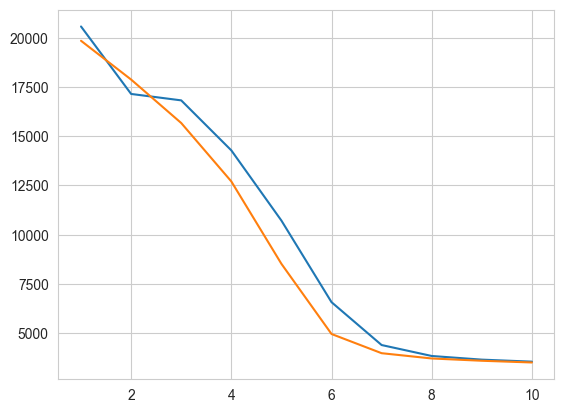

2779/2779 [==============================] - 9s 3ms/step - loss: 32074056.0000 - mae: 3526.8723 - mse: 32074056.0000
----model evaluation report ----
Testing Data loss: 32074056.00, mean absolute error: 3526.87 and mean square error 32074056.00


In [231]:
test_ann(df_features.iloc[idx], 'relu')


### Evaluate the model separating the classes

In [232]:
test_mae(df_features.loc[class_eco])

----LinearRegression----
mean_absolute_error: 1706.9483393911319
----XGBRegressor----
mean_absolute_error: 901.9108736354458
----KNeighborsRegressor----
mean_absolute_error: 792.0570149987707
Learning rate set to 0.08962
0:	learn: 3055.0799766	total: 58.5ms	remaining: 58.4s
1:	learn: 2893.7107831	total: 92.8ms	remaining: 46.3s
2:	learn: 2754.0129518	total: 126ms	remaining: 41.8s
3:	learn: 2630.9894200	total: 160ms	remaining: 39.8s
4:	learn: 2523.4436856	total: 214ms	remaining: 42.7s
5:	learn: 2428.3404287	total: 273ms	remaining: 45.3s
6:	learn: 2345.6314061	total: 324ms	remaining: 46s
7:	learn: 2273.5738701	total: 380ms	remaining: 47.1s
8:	learn: 2211.7829498	total: 463ms	remaining: 50.9s
9:	learn: 2156.4695695	total: 514ms	remaining: 50.9s
10:	learn: 2108.9290271	total: 555ms	remaining: 49.9s
11:	learn: 2066.9960926	total: 594ms	remaining: 48.9s
12:	learn: 2031.3147805	total: 680ms	remaining: 51.6s
13:	learn: 2000.6018338	total: 722ms	remaining: 50.9s
14:	learn: 1974.2342483	total: 75

no of epochs: 10
input_shape: 29
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 100)               3000      
                                                                 
 dense_61 (Dense)            (None, 100)               10100     
                                                                 
 dense_62 (Dense)            (None, 100)               10100     
                                                                 
 dense_63 (Dense)            (None, 100)               10100     
                                                                 
 dense_64 (Dense)            (None, 100)               10100     
                                                                 
 dense_65 (Dense)            (None, 1)                 101       
                                                                 
Total params: 43,501


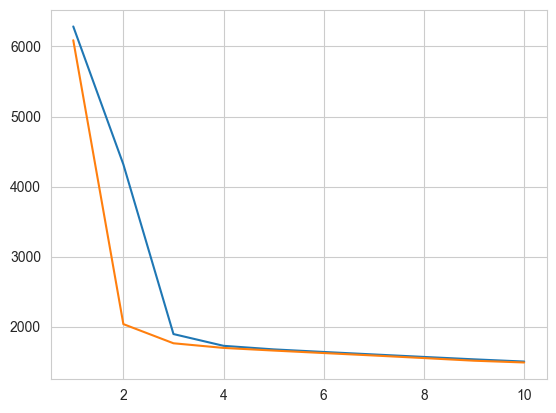

1907/1907 [==============================] - 6s 3ms/step - loss: 4034229.7500 - mae: 1498.3707 - mse: 4034229.7500
----model evaluation report ----
Testing Data loss: 4034229.75, mean absolute error: 1498.37 and mean square error 4034229.75


In [233]:
test_ann(df_features.loc[class_eco], 'relu')

In [234]:
test_mae(df_features.loc[class_bsn])

----LinearRegression----
mean_absolute_error: 6712.3510584948235
----XGBRegressor----
mean_absolute_error: 3214.5941865969326
----KNeighborsRegressor----
mean_absolute_error: 3709.0018913207005
Learning rate set to 0.079208
0:	learn: 12133.3341567	total: 23.8ms	remaining: 23.8s
1:	learn: 11696.4438436	total: 42.6ms	remaining: 21.3s
2:	learn: 11280.8754454	total: 65.4ms	remaining: 21.8s
3:	learn: 10927.4771987	total: 87.5ms	remaining: 21.8s
4:	learn: 10608.3464710	total: 109ms	remaining: 21.7s
5:	learn: 10337.3248903	total: 128ms	remaining: 21.3s
6:	learn: 10036.2640234	total: 153ms	remaining: 21.7s
7:	learn: 9805.8365562	total: 175ms	remaining: 21.8s
8:	learn: 9585.5742443	total: 199ms	remaining: 21.9s
9:	learn: 9388.0891163	total: 223ms	remaining: 22.1s
10:	learn: 9208.6952946	total: 246ms	remaining: 22.1s
11:	learn: 9054.4049726	total: 274ms	remaining: 22.5s
12:	learn: 8930.2993006	total: 294ms	remaining: 22.3s
13:	learn: 8817.0687387	total: 312ms	remaining: 22s
14:	learn: 8707.57928

no of epochs: 10
input_shape: 29
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_66 (Dense)            (None, 100)               3000      
                                                                 
 dense_67 (Dense)            (None, 100)               10100     
                                                                 
 dense_68 (Dense)            (None, 100)               10100     
                                                                 
 dense_69 (Dense)            (None, 100)               10100     
                                                                 
 dense_70 (Dense)            (None, 100)               10100     
                                                                 
 dense_71 (Dense)            (None, 1)                 101       
                                                                 
Total params: 43,501


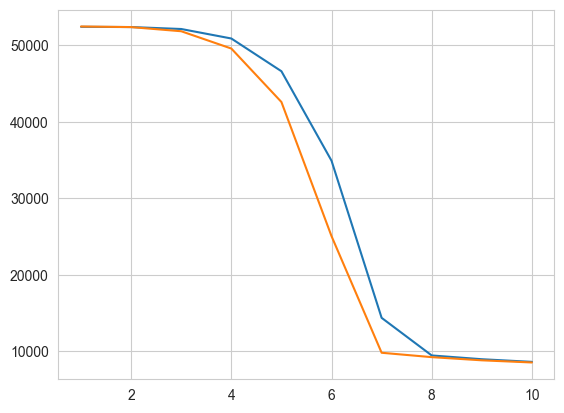

873/873 [==============================] - 2s 3ms/step - loss: 110591744.0000 - mae: 8437.9551 - mse: 110591744.0000
----model evaluation report ----
Testing Data loss: 110591744.00, mean absolute error: 8437.96 and mean square error 110591744.00


In [235]:
test_ann(df_features.loc[class_bsn], 'relu')

### Make Decision

after executing all the possible way, we can conclude that we can go for two separate model for two classes. Economy class is showing only mae 792.0570149987707  for KNN and business class is showing mae 3214.5941865969326 